In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, zscore
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Real estate Banking/train.csv')
data

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.

# **GIẢI THÍCH DỮ LIỆU:**

**I.THÔNG TIN VỀ ĐỊA LÝ:**

**UID:** Mã định danh duy nhất cho mỗi bản ghi hoặc đơn vị (unique identifier).

**BLOCKID:** Mã định danh cho một khu vực dân cư cụ thể

**SUMLEVEL:** Cấp độ tóm tắt của dữ liệu (summary level), cho biết mức độ chi tiết của dữ liệu

**COUNTYID:** Mã định danh cho quận (county)

**STATEID:** Mã định danh của bang (state).

**state:** Tên của bang

**state_ab:** Tên viết tắt của bang (ví dụ: CA cho California, TX cho Texas).

**city:** Tên thành phố nơi dữ liệu được thu thập.

**place:** Tên địa điểm hoặc khu vực cụ thể

**type:** Loại hình khu vực (ví dụ: khu dân cư, khu thương mại...).

**primary:** Biểu thị một đơn vị chính trong dữ liệu hoặc vùng chính được nghiên cứu.

**zip_code:** Mã bưu điện của khu vực.

**area_code:** Mã vùng điện thoại cho khu vực đó.

**lat vs lng:** Vĩ độ và Kinh độ của vị trí

**ALand:** Diện tích đất tự nhiên (không bao gồm diện tích mặt nước) trong khu vực.

**AWater:** Diện tích mặt nước trong khu vực.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**II.THÔNG TIN VỀ DÂN SỐ:**

**pop:** Tổng dân số trong khu vực.

**male_pop vs female_pop:** Dân số nam giới và nữ giới

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**III.THÔNG TIN VỀ GIÁ NHÀ**

**rent_mean:** Giá thuê nhà trung bình trong khu vực.

**rent_median:** Giá thuê nhà trung vị (median rent)

**rent_stdev:** Độ lệch chuẩn của giá thuê nhà, cho biết mức độ biến động của giá thuê.

**rent_sample_weight:** Trọng số mẫu dùng để tính toán các giá trị thuê nhà.

**rent_samples:** Số lượng mẫu thu thập cho giá thuê.

**rent_gt_10, 15, 20, 25, 30, 35, 40, 50:** Số lượng các hộ gia đình có tỷ lệ chi tiêu cho tiền thuê nhà trên 10, 15, 20, 25, 30, 35, 40, 50% thu nhập.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**IV.THÔNG TIN VỀ THU NHẬP**

**hi_mean:** Thu nhập hộ gia đình trung bình.

**hi_median:** Thu nhập hộ gia đình trung vị.

**hi_stdev:** Độ lệch chuẩn của thu nhập hộ gia đình.

**hi_sample_weight:** Trọng số mẫu dùng để tính thu nhập.

**hi_samples:** Số mẫu được sử dụng để tính toán thu nhập.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**V.THÔNG TIN VỀ HỘ GIA ĐÌNH**

**family_mean:** Thu nhập trung bình của hộ gia đình.

**family_median:** Thu nhập trung vị của hộ gia đình.

**family_stdev:** Độ lệch chuẩn của thu nhập hộ gia đình.

**family_sample_weight:** Trọng số mẫu cho thu nhập hộ gia đình.

**family_samples:** Số mẫu thu thập về thu nhập hộ gia đình.

**pct_own:** Tỷ lệ phần trăm các hộ gia đình sở hữu nhà.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**VI.THÔNG TIN VỀ CHI PHÍ THẾ CHẤP**

**hc_mortgage_mean:** Chi phí trung bình của khoản thế chấp nhà (mortgage cost).

**hc_mortgage_median:** Chi phí trung vị của khoản thế chấp.

**hc_mortgage_stdev:** Độ lệch chuẩn của chi phí thế chấp.

**hc_mortgage_sample_weight:** Trọng số mẫu cho các khoản thế chấp.

**hc_mortgage_samples:** Số mẫu thu thập về thế chấp.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**VII.THÔNG TIN VỀ CHỦ SỞ HỮU VÀ NỢ**

**home_equity_second_mortgage:** Giá trị tài sản nhà khi có thế chấp thứ hai

**second_mortgage:** Thông tin về khoản thế chấp thứ hai.

**home_equity:** Giá trị tài sản nhà (home equity) của chủ sở hữu.

**debt:** Tổng số nợ của chủ nhà.

**second_mortgage_cdf, home_equity_cdf, debt_cdf:** Phân phối tích lũy của các giá trị tương ứng.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**VIII.TRÌNH ĐỘ HỌC VẤN**

**hs_degree:** Tỷ lệ dân số có bằng trung học (high school degree).

**hs_degree_male:** Tỷ lệ nam giới có bằng trung học.

**hs_degree_female:** Tỷ lệ nữ giới có bằng trung học.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

**IX.THÔNG TIN CÁ NHÂN**
**married:** Tỷ lệ dân số đã kết hôn.

**married_snp:** Số người kết hôn không tính số người sống độc thân (single and never married population).

**separated:** Tỷ lệ dân số đã ly thân.

**divorced:** Tỷ lệ dân số đã ly dị.

**male_age_mean:** Tuổi trung bình của nam giới.

**male_age_median:** Tuổi trung vị của nam giới.

**male_age_stdev:** Độ lệch chuẩn tuổi của nam giới.

**male_age_sample_weight, male_age_samples:** Trọng số và số mẫu cho dữ liệu tuổi của nam giới.

**female_age_mean:** Tuổi trung bình của nữ giới.

**female_age_median:** Tuổi trung vị của nữ giới.

**female_age_stdev:** Độ lệch chuẩn tuổi của nữ giới.

**female_age_sample_weight, female_age_samples:** Trọng số và số mẫu cho dữ liệu tuổi của nữ giới.

# **CHECKING**

In [4]:
#Xóa đi một số columns nhìn là biết có tính tương quan cao và các Null:
def pre_delete_cols(data):
  data = data.drop(columns = ['state', 'state_ab', 'UID',	'BLOCKID', 'primary', 'SUMLEVEL'])
  data = data.dropna()
  return data
data = pre_delete_cols(data)
data.shape

(26585, 74)

In [5]:
#Chia các columns thành 2 loại: Phân loại và Số
category_cols = ['COUNTYID', 'STATEID', 'city', 'place', 'type', 'zip_code', 'area_code']
numeric_cols = [col for col in data.columns if col not in category_cols]
numeric_cols.remove('hc_mortgage_mean')

In [6]:
(data[numeric_cols]).describe()

,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,26585.000000,26585.000000,2.658500e+04,2.658500e+04,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.00000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.00000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,37.539017,-91.286140,1.317101e+08,6.511419e+06,4367.763438,2143.260786,2224.502652,1054.368845,1006.738048,394.841936,293.339724,542.476848,0.958087,0.867098,0.739022,0.612182,0.499305,0.410476,0.344916,0.253993,575.549031,529.474854,70708.347985,57780.085274,54738.129329,928.938169,1620.788189,79282.24354,69538.564040,50988.325084,536.316364,1071.913335,1549.090239,623.715807,289.128327,673.327816,540.918846,513.666015,219.231295,371.911341,255.866268,0.025611,0.029876,0.100928,0.629911,0.463601,0.474121,0.500011,0.859577,0.853201,0.865955,38.483897,38.246499,21.664675,532.890116,2143.260786,40.475837,40.53396,22.343746,545.605739,2224.502652,0.649487,0.512602,0.046774,0.018981,0.100805
std,5.580000,16.276509,1.292252e+09,2.212975e+08,2093.787018,1049.611697,1075.075707,435.326552,441.295118,187.091918,265.721282,448.594810,0.060349,0.107772,0.142165,0.158783,0.162433,0.158614,0.151718,0.136243,451.011237,437.255307,29886.692435,28843.450136,17379.770964,445.764573,741.074896,31125.02069,33234.517141,13999.663226,283.613828,553.264998,649.429100,236.599540,194.824096,463.314666,220.885265,231.005517,90.850824,250.170015,189.652309,0.027753,0.030664,0.065590,0.148977,0.291798,0.252460,0.260793,0.110139,0.118085,0.109423,5.376277,7.711018,2.100021,270.960291,1049.611697,5.586680,7.80554,2.054138,275.046788,1075.075707,0.214469,0.130688,0.035556,0.020049,0.047694
min,17.929085,-165.453872,4.739600e+04,0.000000e+00,63.000000,35.000000,28.000000,172.725000,131.000000,18.257420,0.343000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,8858.934220,6544.000000,7285.005300,6.132560,18.000000,10706.26180,7195.000000,5070.320960,1.399780,7.000000,251.000000,36.514840,0.198400,1.000000,53.594610,53.000000,18.257420,2.000000,0.614040,0.000000,0.000000,0.000000,0.013590,0.000410,0.000940,0.014980,0.186520,0.125980,0.215050,16.142670,9.750000,3.642590,8.411220,35.000000,18.770920,13.25000,3.053590,6.978290,28.000000,0.003530,0.005700,0.000000,0.000000,0.000000
25%,33.911765,-97.794235,1.842613e+06,0.000000e+00,2938.000000,1427.000000,1489.000000,743.624710,703.000000,264.138120,102.597660,221.000000,0.940410,0.818820,0.661350,0.516700,0.395940,0.307290,0.243480,0.161030,257.000000,216.0

In [8]:
#Tính Skewness cho các columns:
for i in numeric_cols:
  print(f'Skewness của {i} là: {data[i].skew()}')

Skewness của lat là: -0.5115342646520437
Skewness của lng là: -0.9833102150615036
Skewness của ALand là: 53.07731693564913
Skewness của AWater là: 77.72822451113426
Skewness của pop là: 2.290192481721776
Skewness của male_pop là: 2.2617283552846095
Skewness của female_pop là: 2.2884860051307108
Skewness của rent_mean là: 1.507808866387765
Skewness của rent_median là: 1.7154177062637321
Skewness của rent_stdev là: 1.4127165913640432
Skewness của rent_sample_weight là: 1.835423985490074
Skewness của rent_samples là: 1.888811171222325
Skewness của rent_gt_10 là: -3.4531274720646667
Skewness của rent_gt_15 là: -1.8768877252325542
Skewness của rent_gt_20 là: -1.002136916011911
Skewness của rent_gt_25 là: -0.5095286736115948
Skewness của rent_gt_30 là: -0.16175823141616522
Skewness của rent_gt_35 là: 0.10170286671575267
Skewness của rent_gt_40 là: 0.32797405863792384
Skewness của rent_gt_50 là: 0.649842417457123
Skewness của universe_samples là: 1.8785722624094736
Skewness của used_samples l

In [12]:
#Tính toán IQR cho các columns:
for i in ['ALand', 'AWater', 'hc_samples', 'hc_sample_weight']:
  #tính toán IQR thông qua Q1,
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 4 * IQR
  upper_bound = Q3 + 4 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(data.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(20681, 74)


In [13]:
#Zscore cho các columns:
threshold = 3
for i in ['rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'family_stdev', 'hc_mortgage_stdev', 'home_equity_cdf', 'debt_cdf', 'female_age_median']:
  data.loc[:, 'z_score'] = zscore(data[i])
  data = data[(data['z_score'] <= threshold) & (data['z_score'] >= -threshold)]

# Loại bỏ cột 'z_score' sau khi lọc
data = data.drop(columns=['z_score'])

print("Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:")
print(data.shape)

Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:
(20112, 74)


# **EDA**

***Biểu đồ barchart cho các columns category***

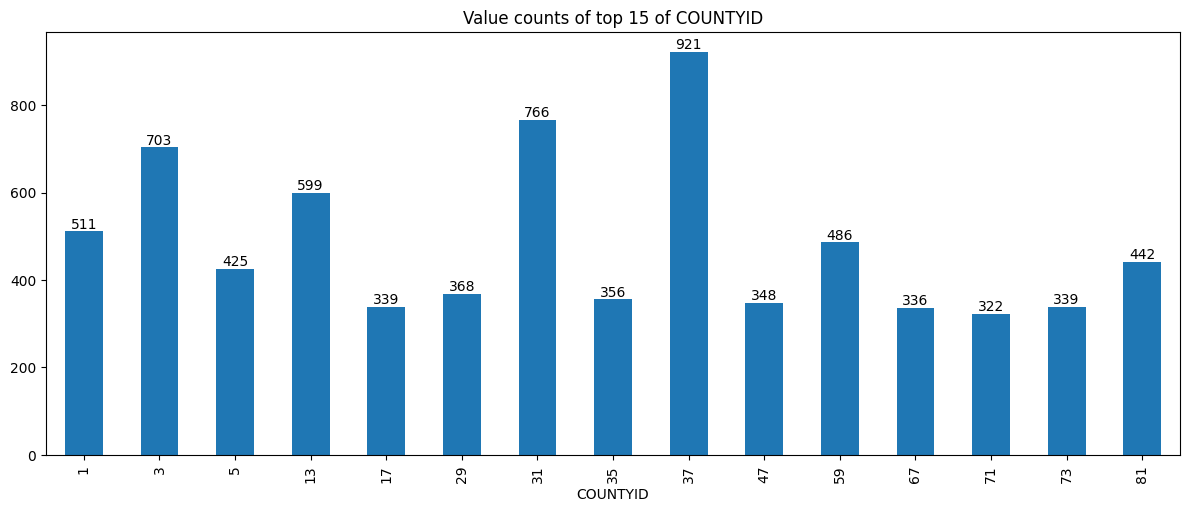

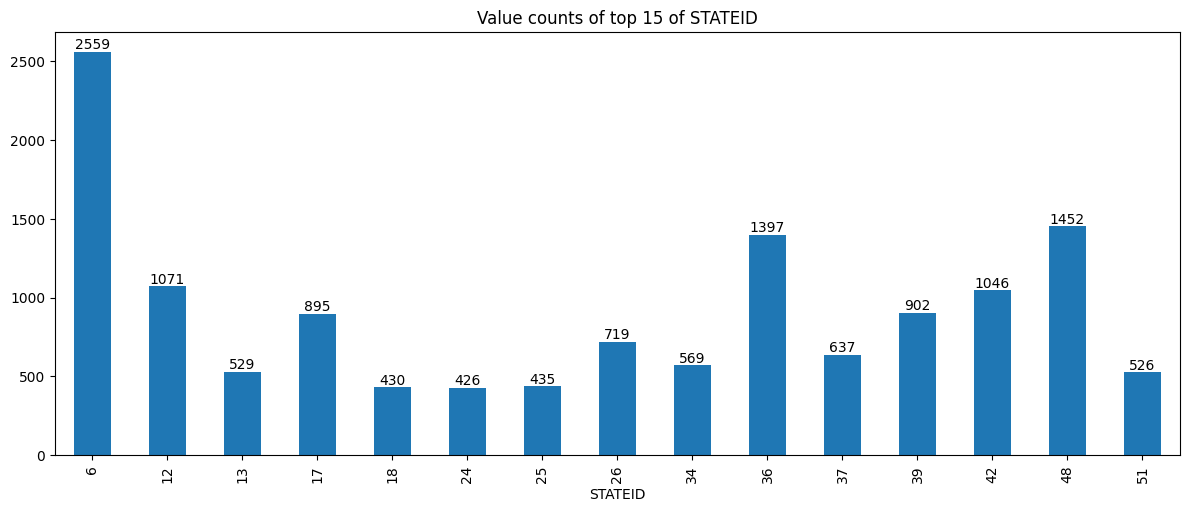

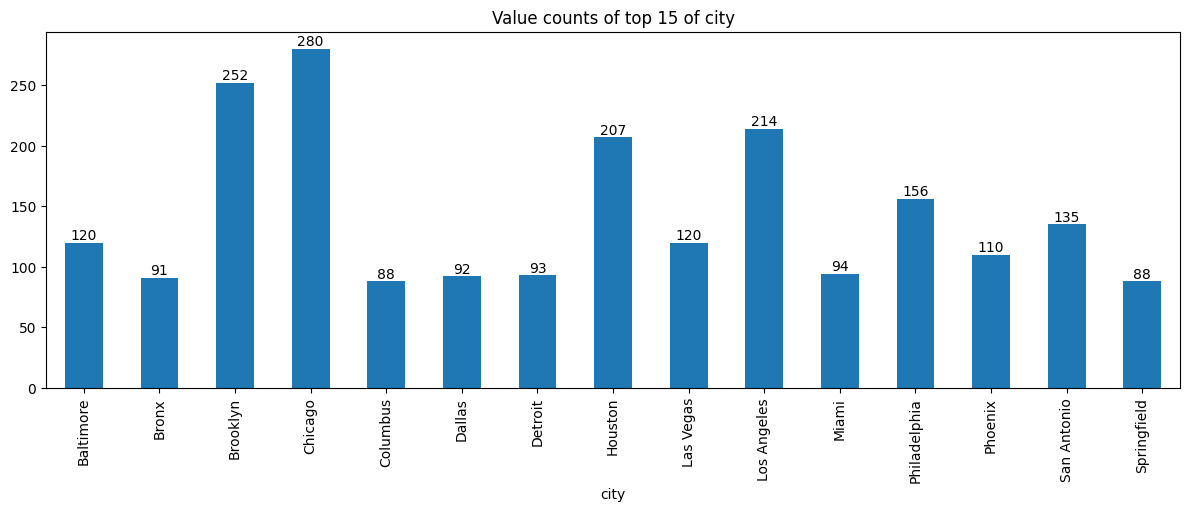

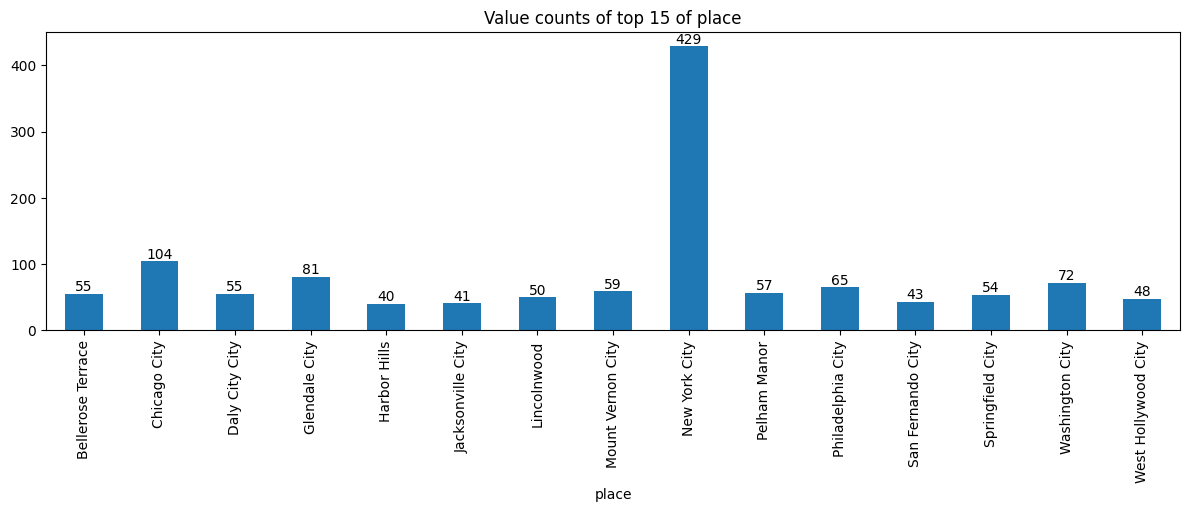

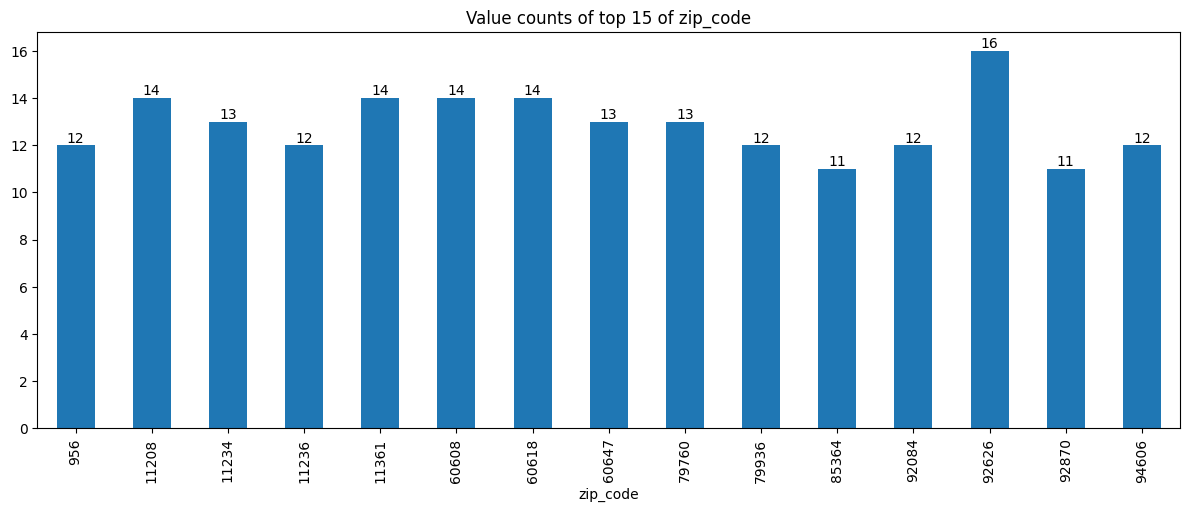

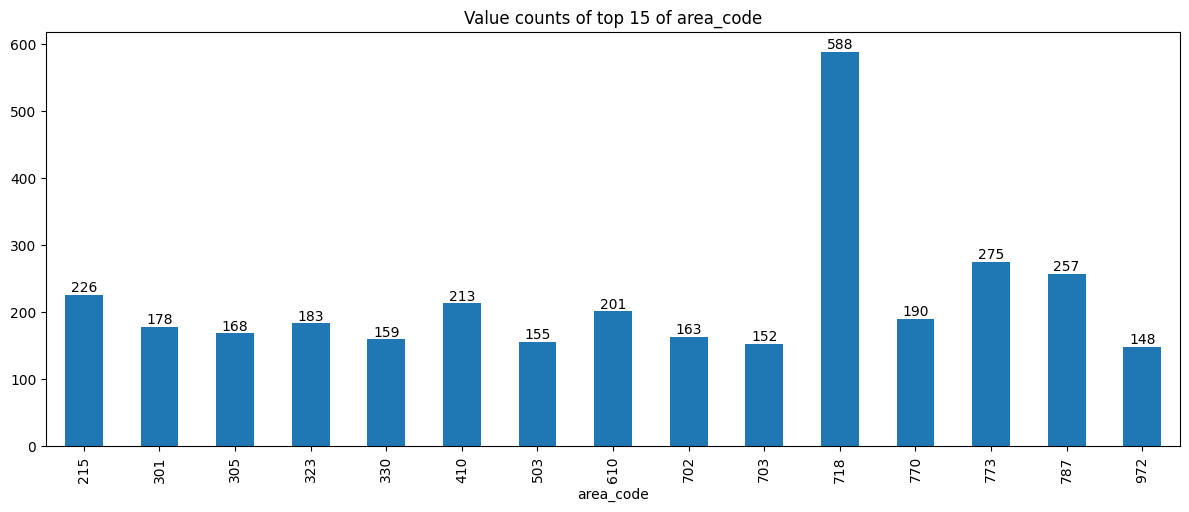

In [14]:
for i in ['COUNTYID', 'STATEID', 'city', 'place', 'zip_code', 'area_code']:
  df_copy = data[data[i].isin(data[i].value_counts().head(15).index)]
  plt.figure(figsize=(12, 5))
  ax1 = df_copy.groupby(i).size().plot(kind='bar')
  for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')
  plt.tight_layout()
  plt.title(f'Value counts of top 15 of {i}')
  plt.show()

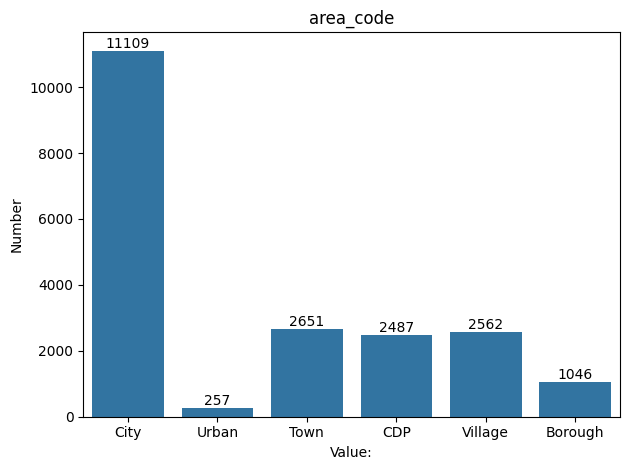

In [15]:
ax2 = sns.countplot(x='type', data=data)
ax2.set_xlabel('Value:')
ax2.set_ylabel('Number')
ax2.set_title(i)
for container in ax2.containers:
  ax2.bar_label(container, label_type='edge')
plt.tight_layout()
plt.show()

***Biểu đồ Histogram chart cho các columns số***

<ipython-input-16-ca4dcda61887>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


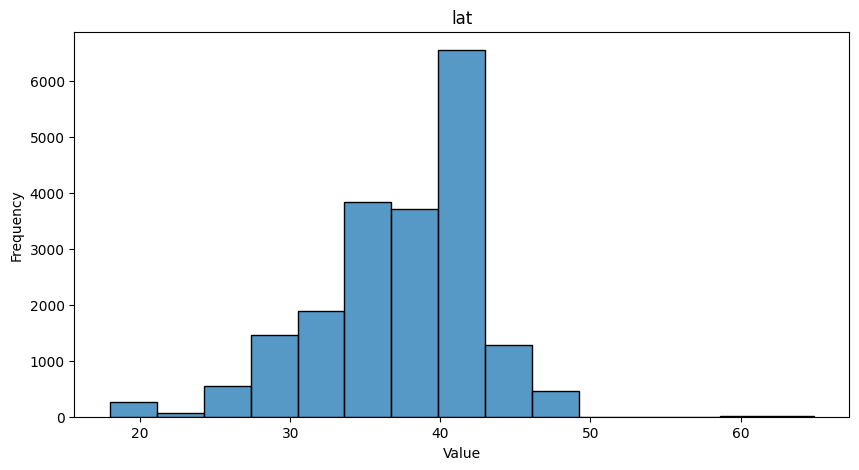

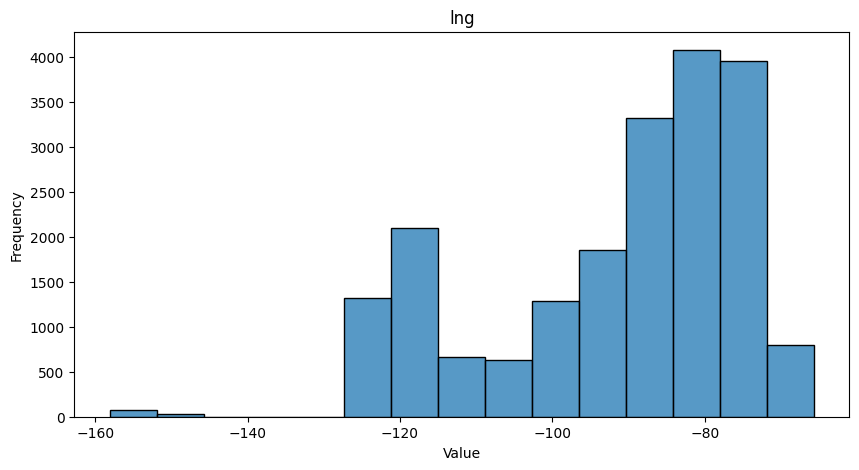

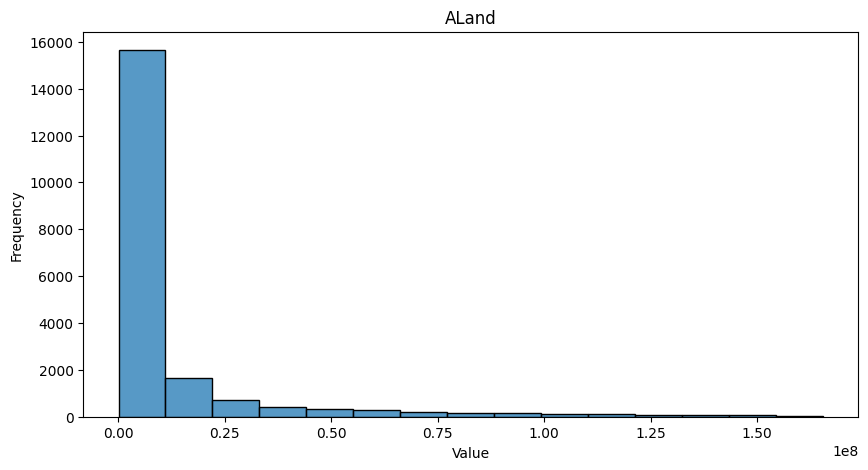

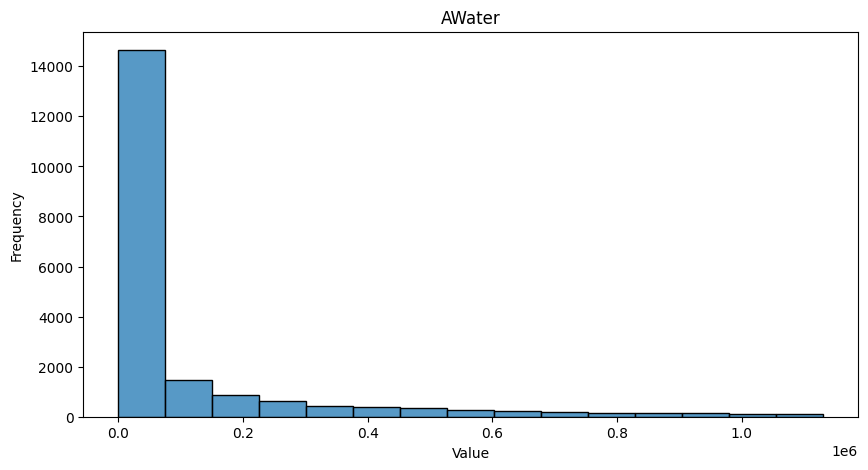

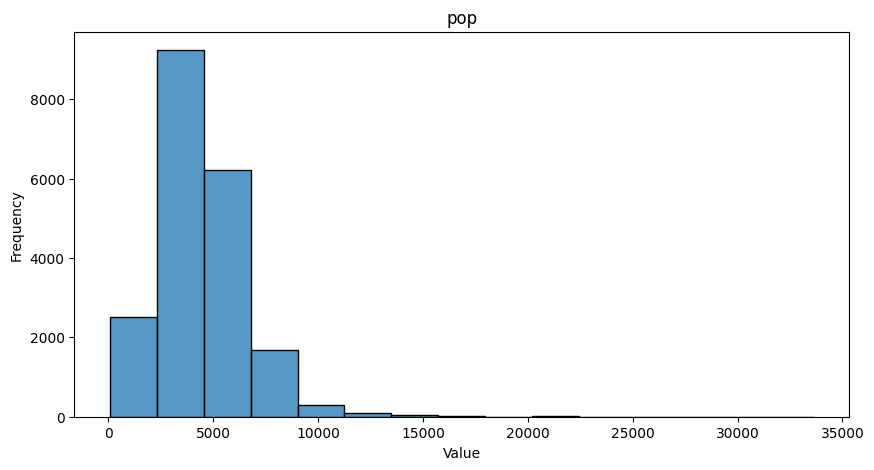

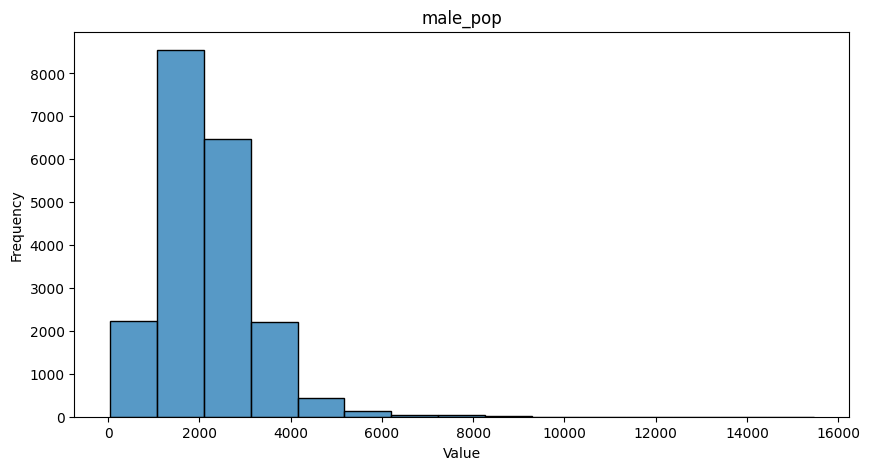

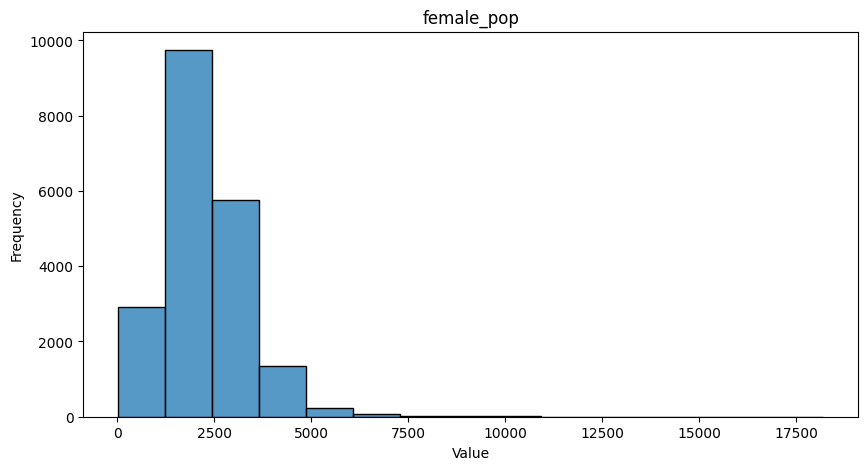

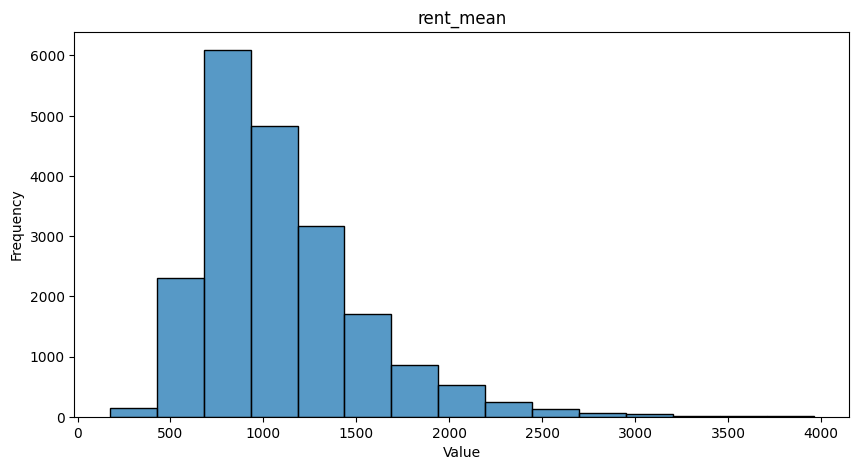

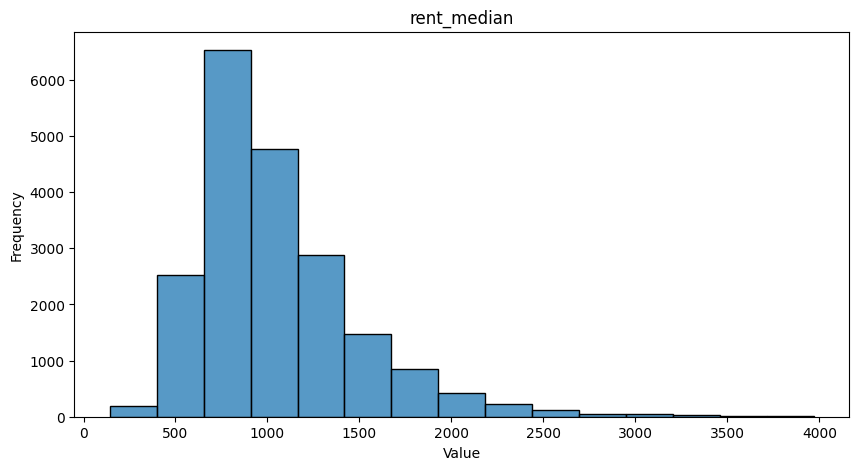

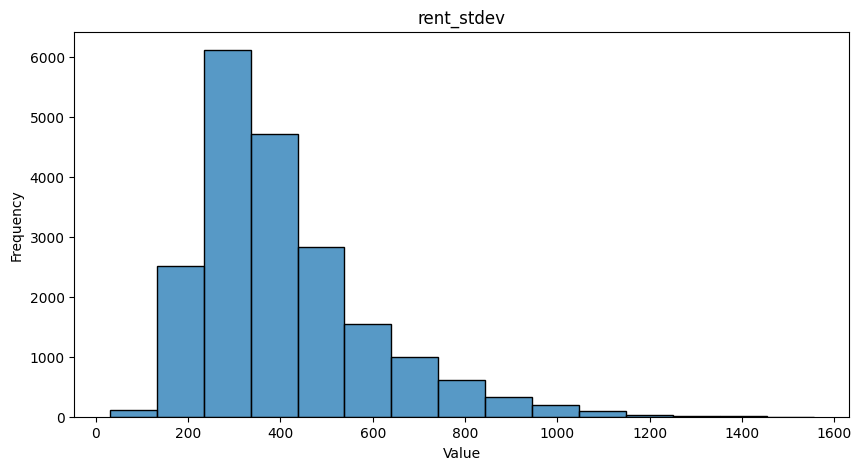

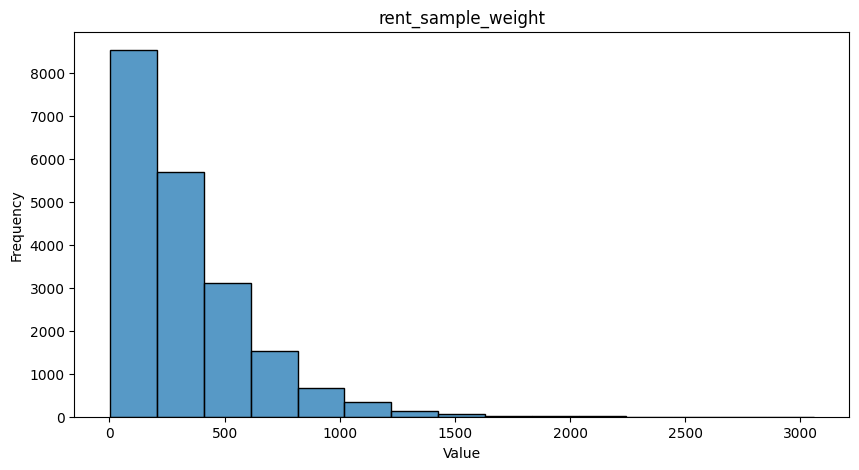

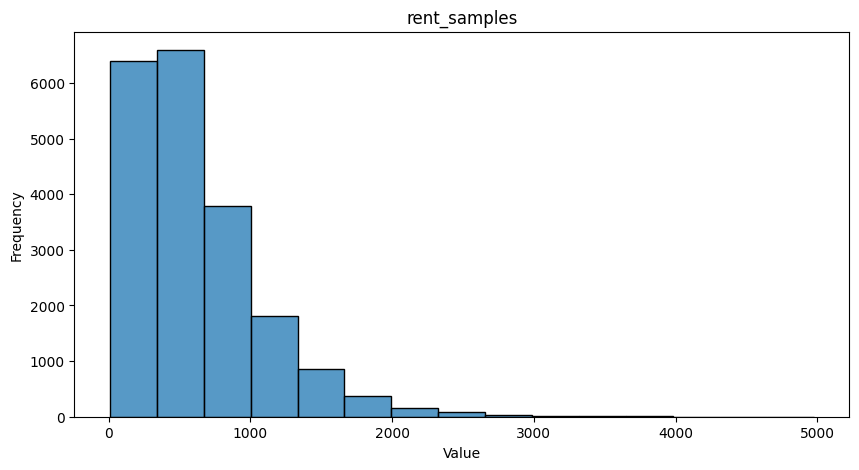

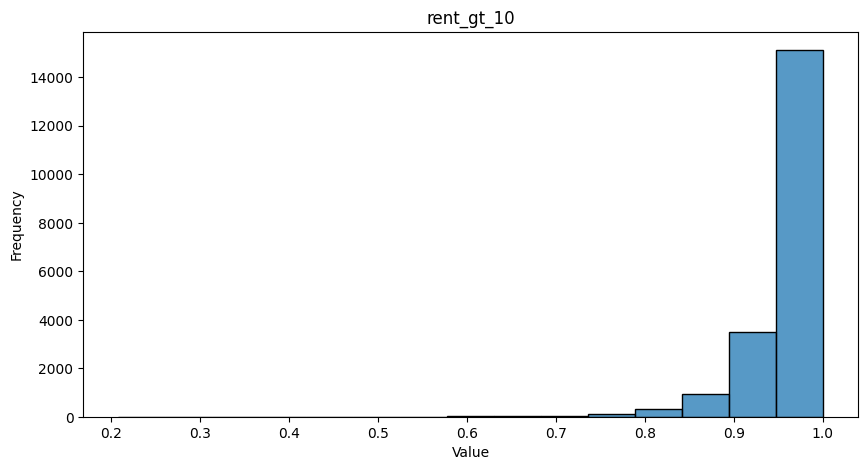

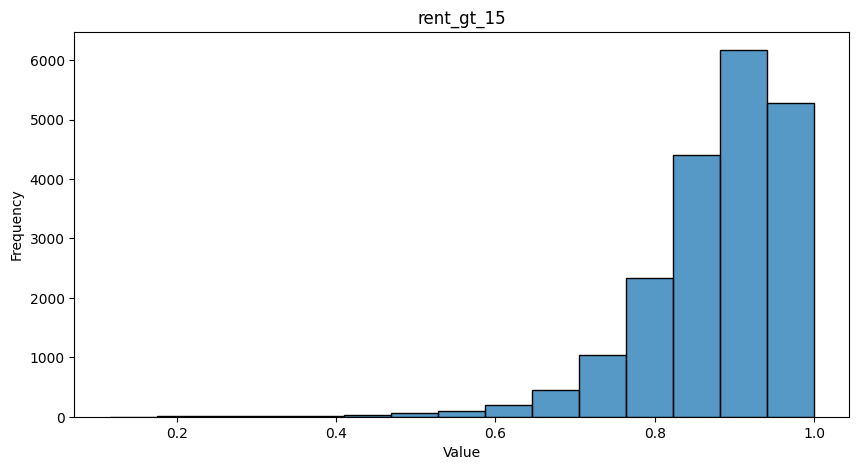

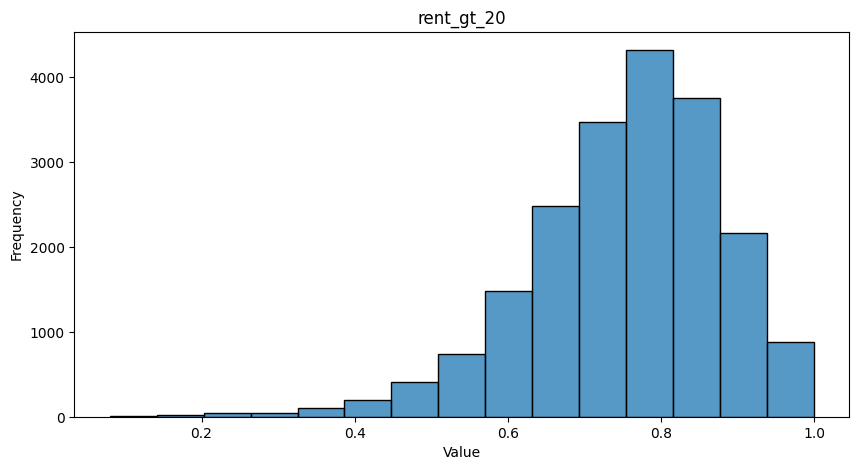

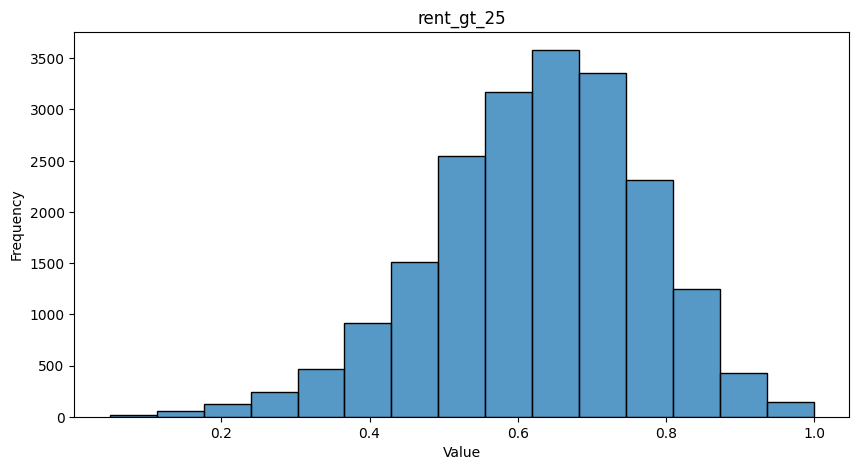

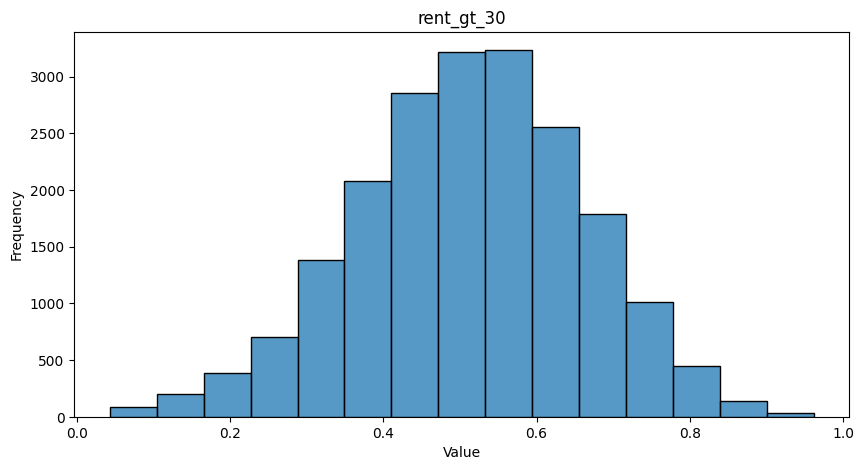

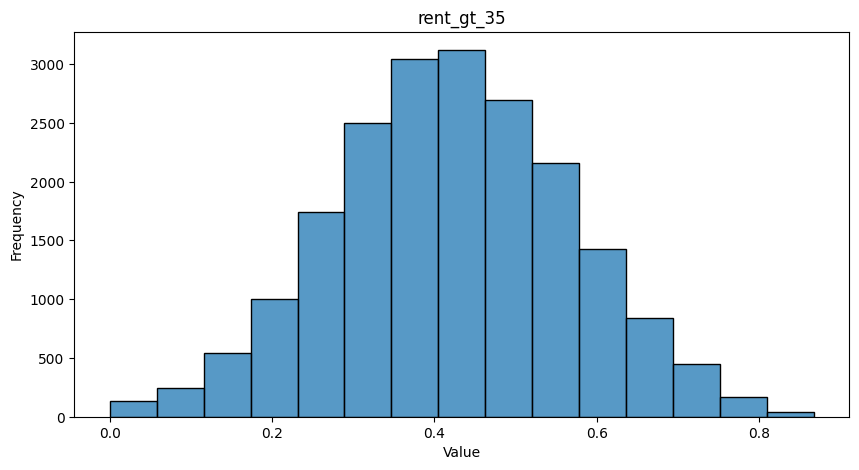

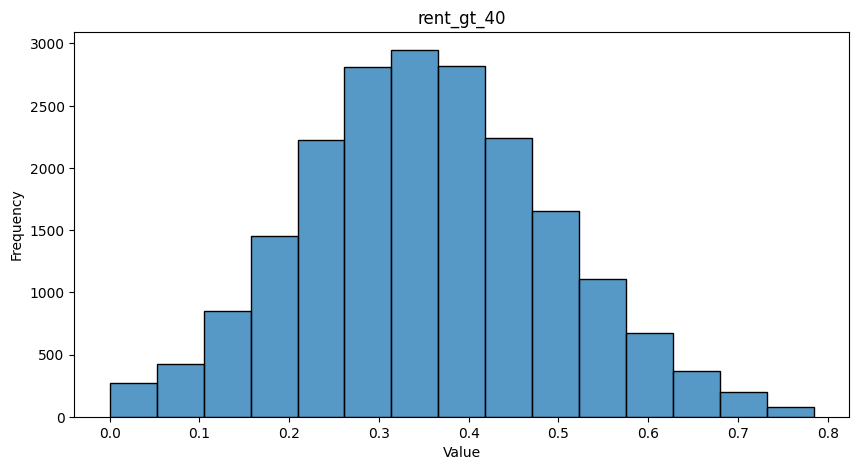

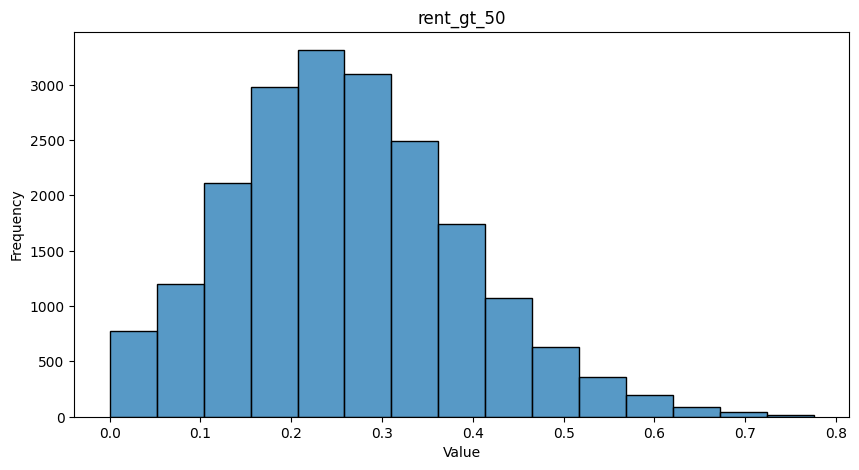

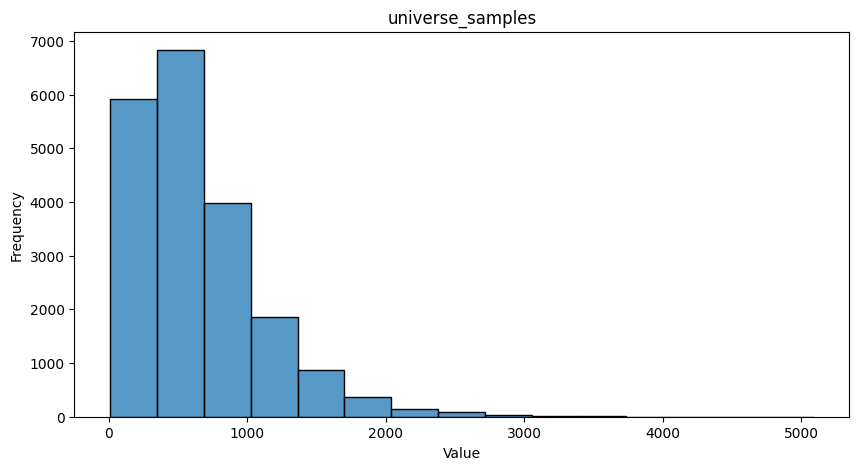

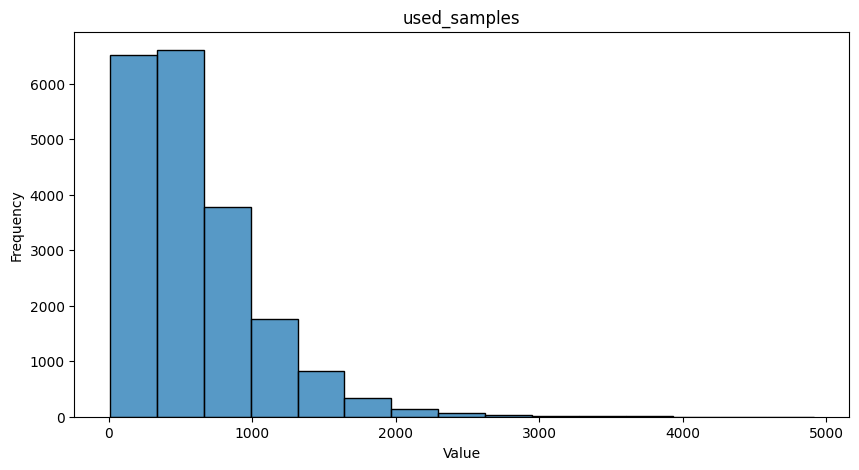

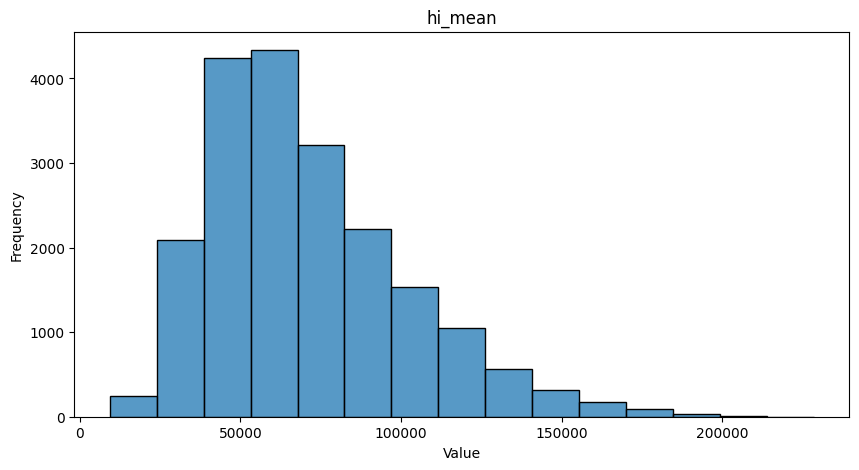

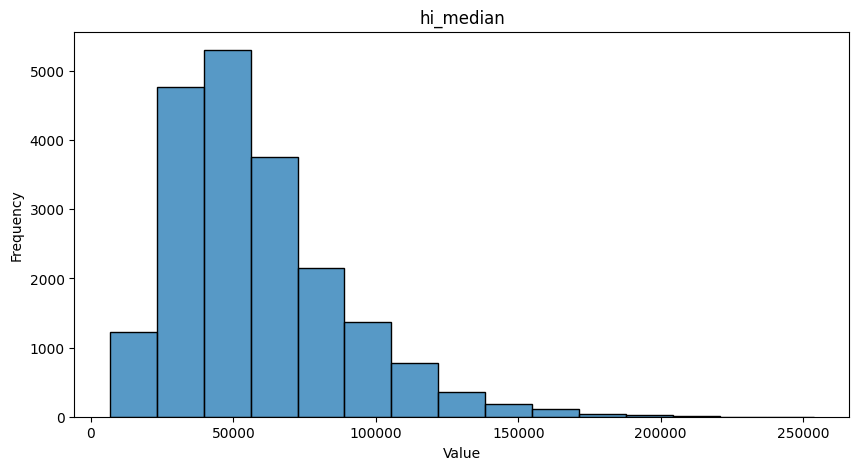

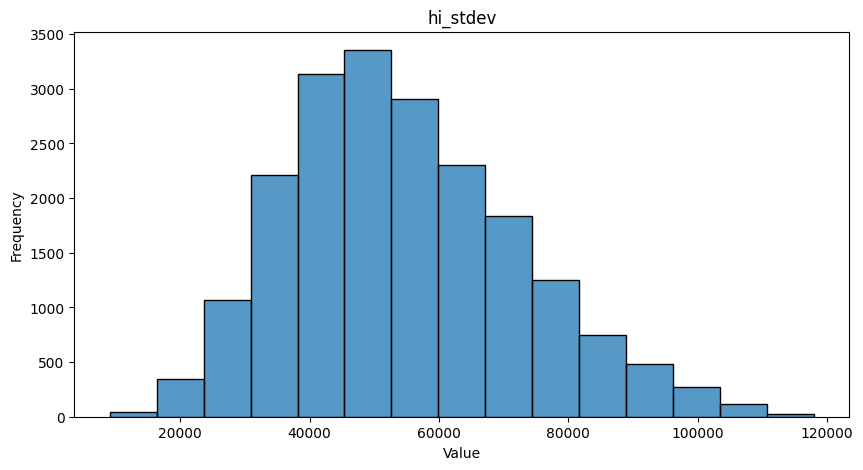

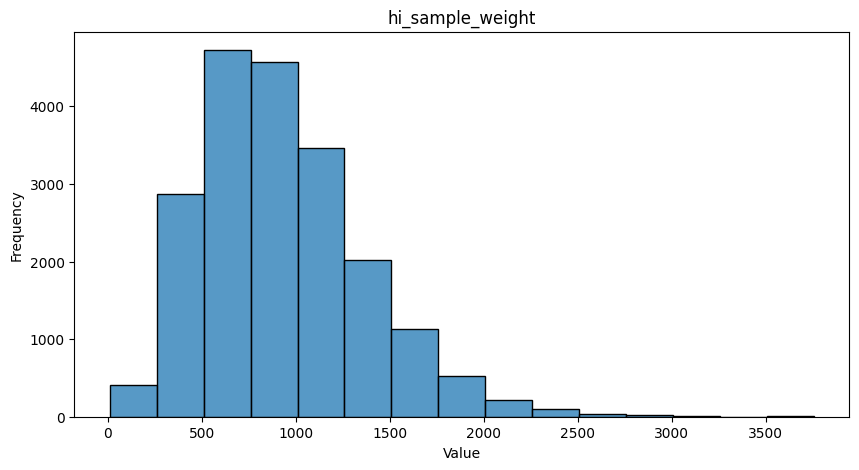

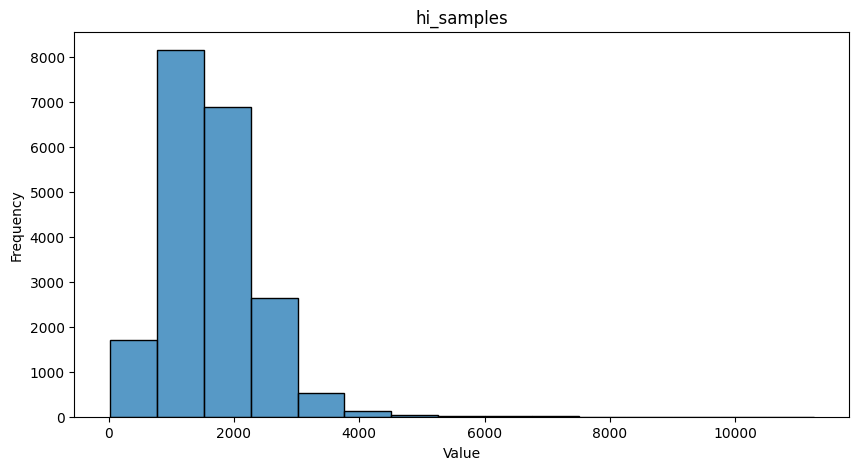

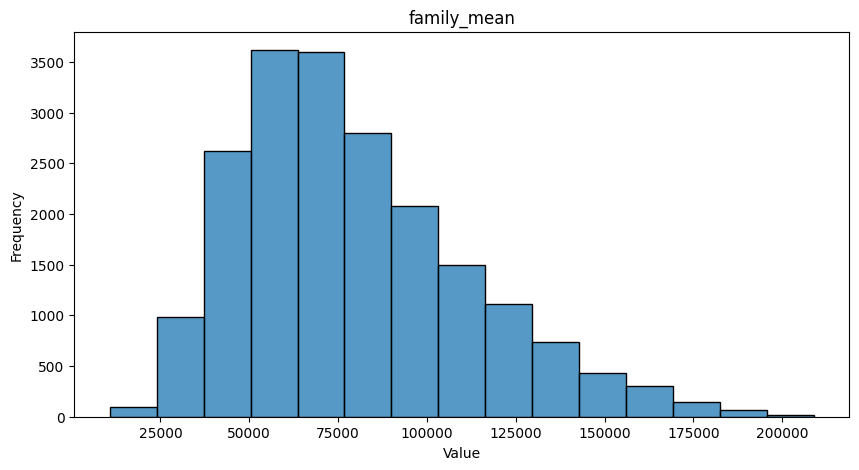

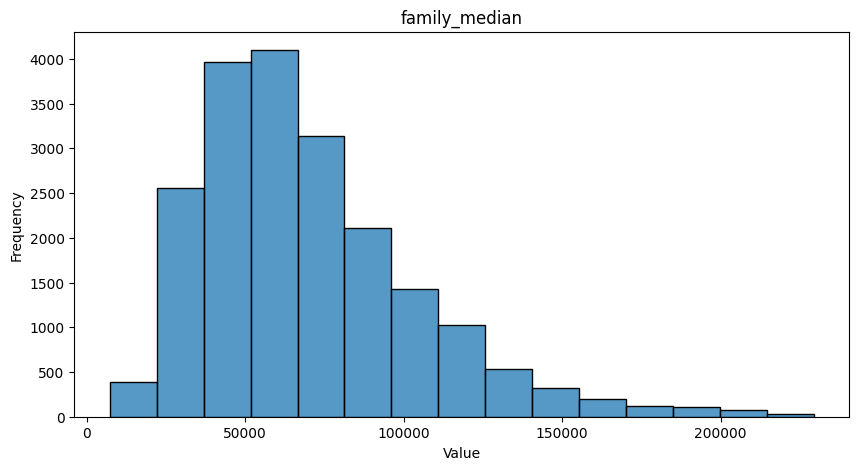

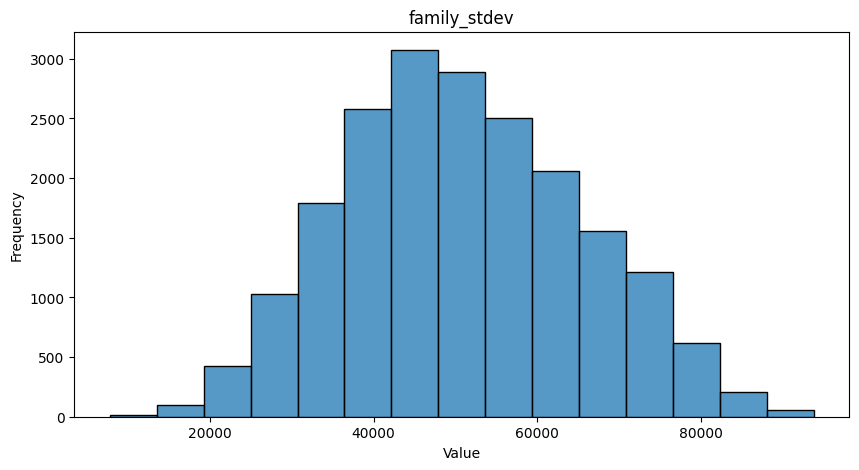

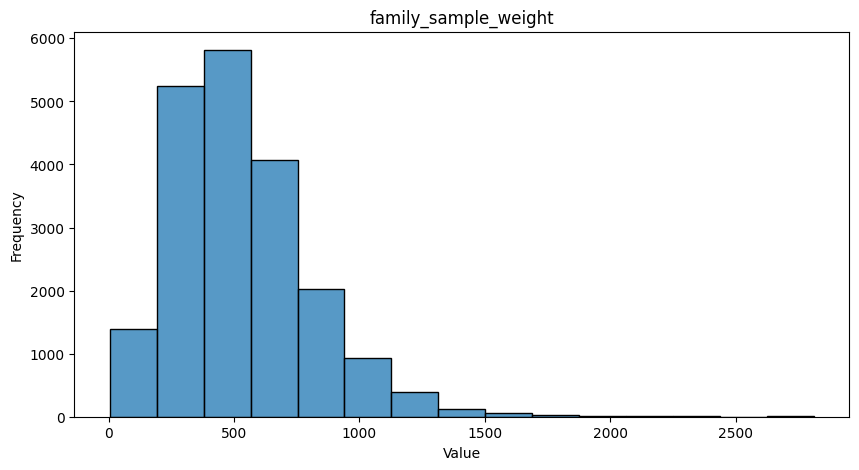

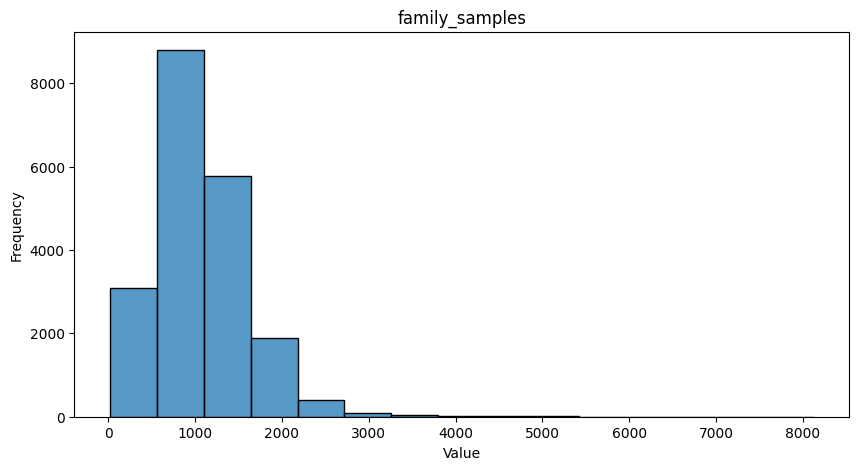

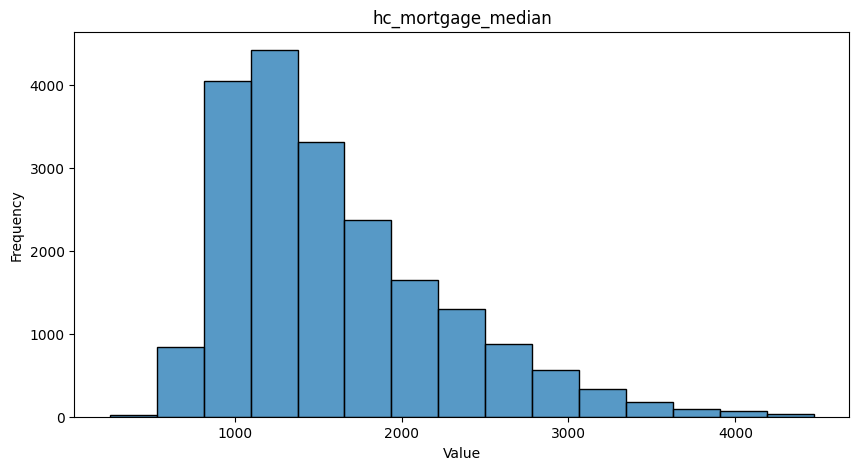

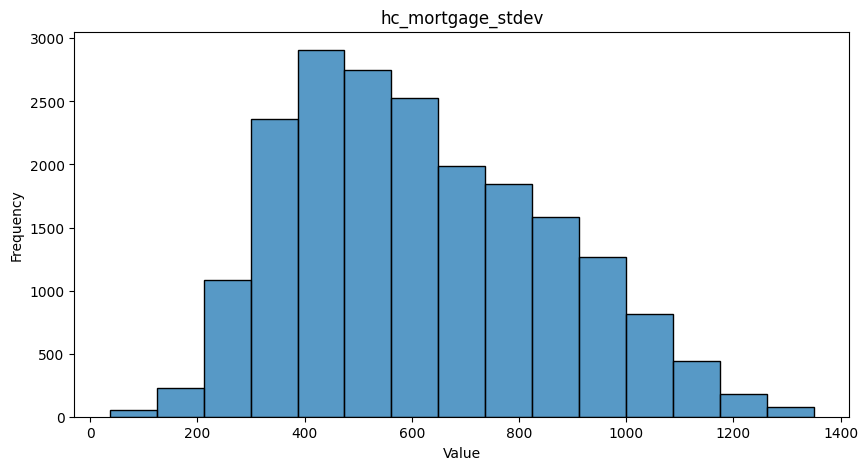

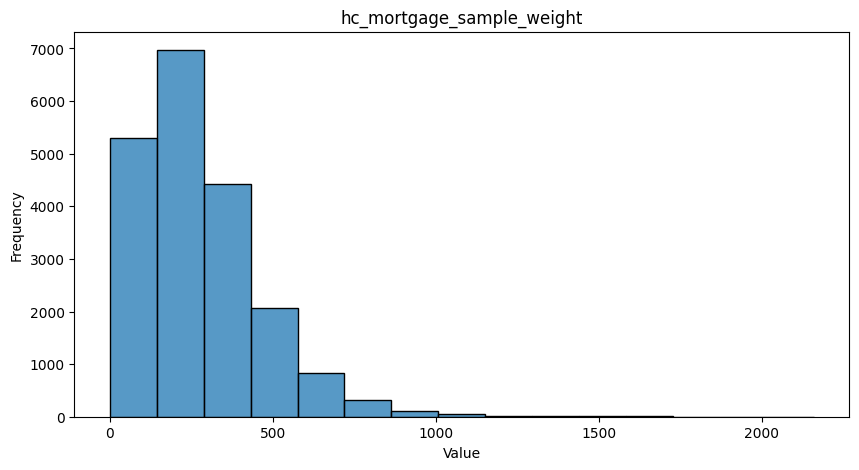

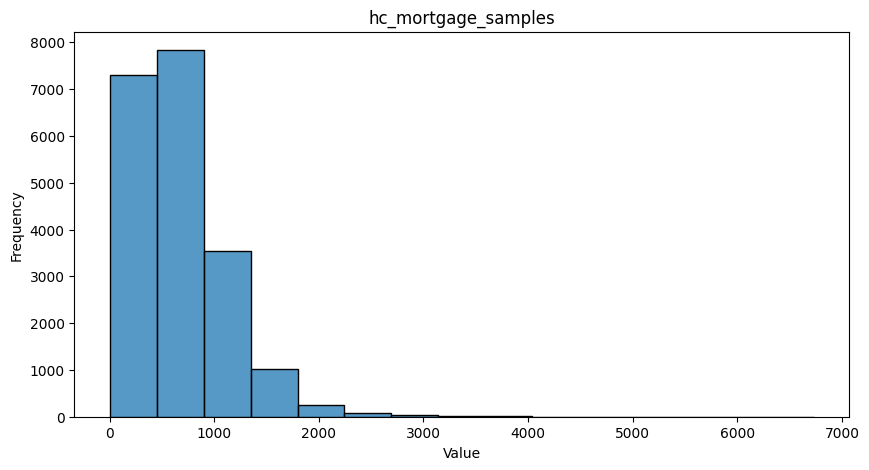

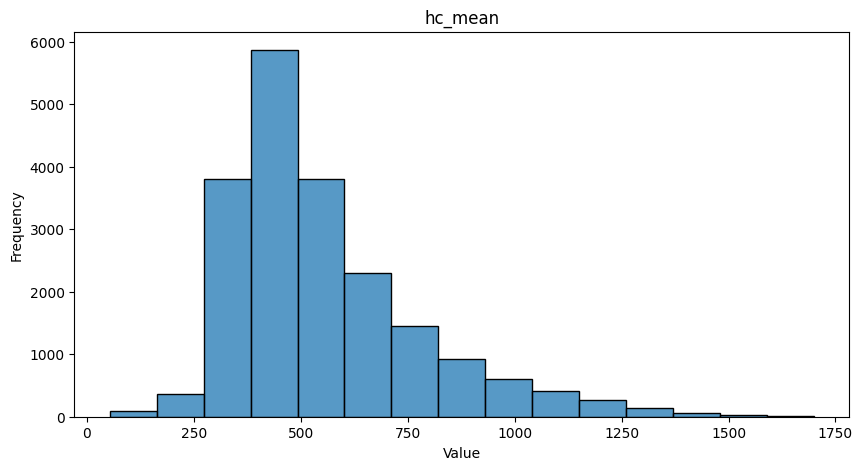

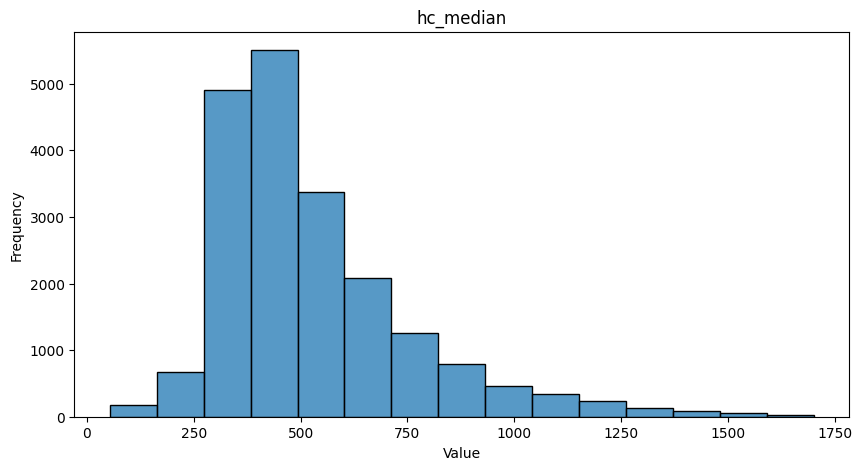

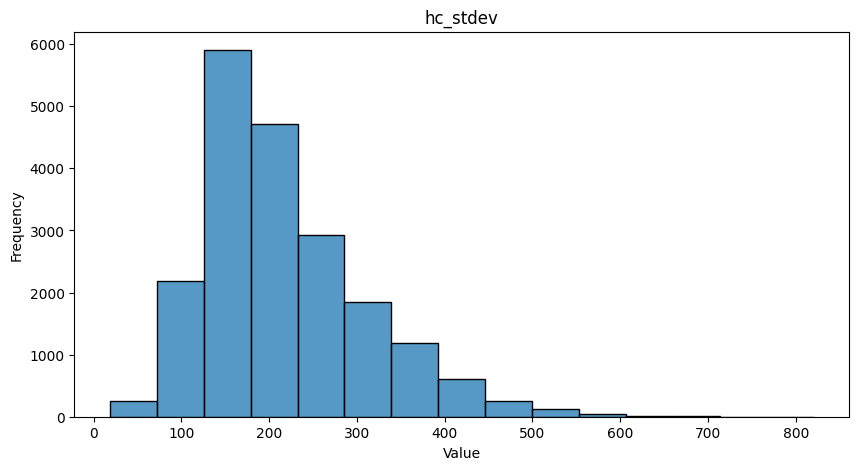

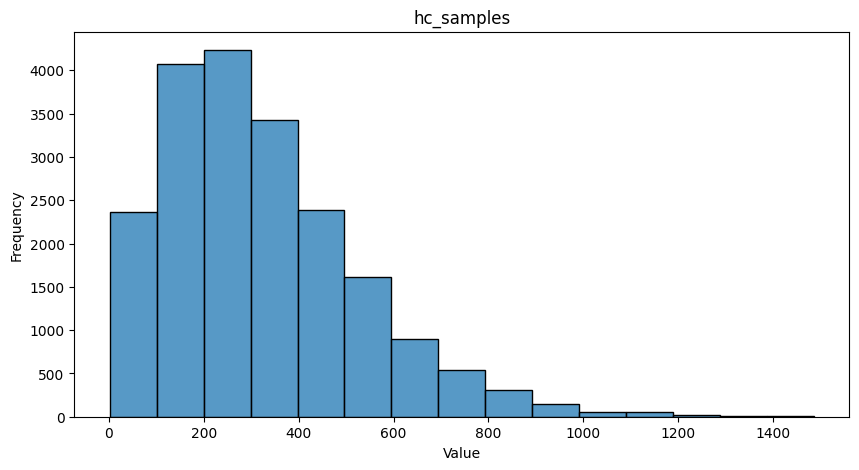

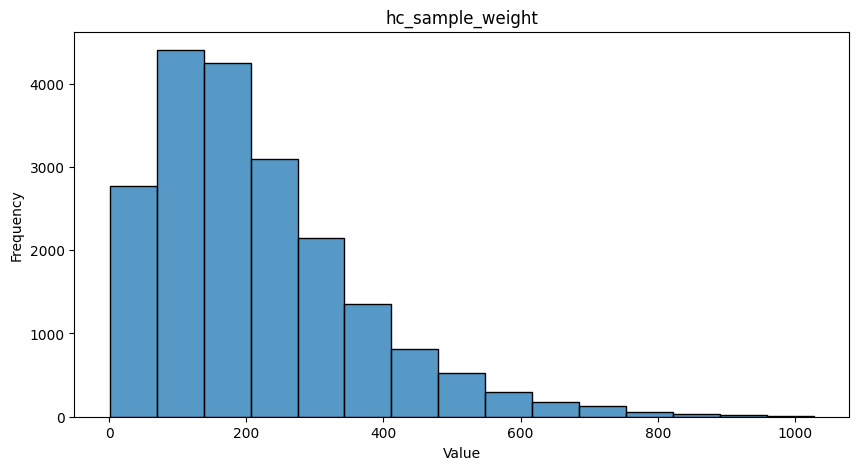

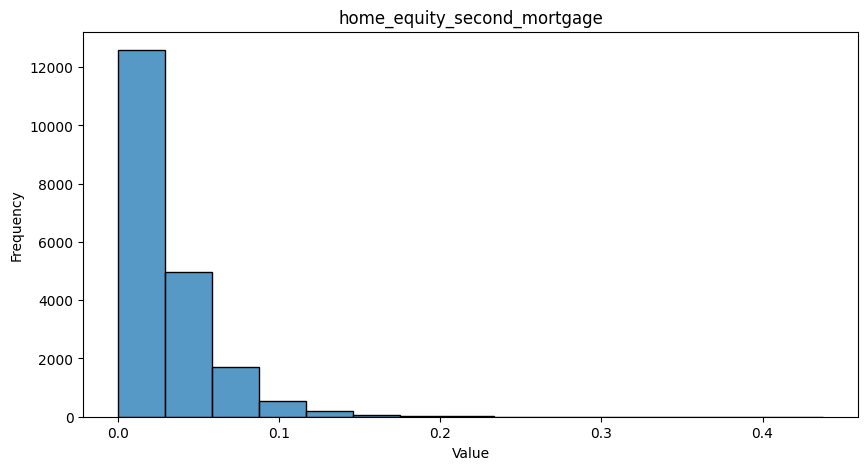

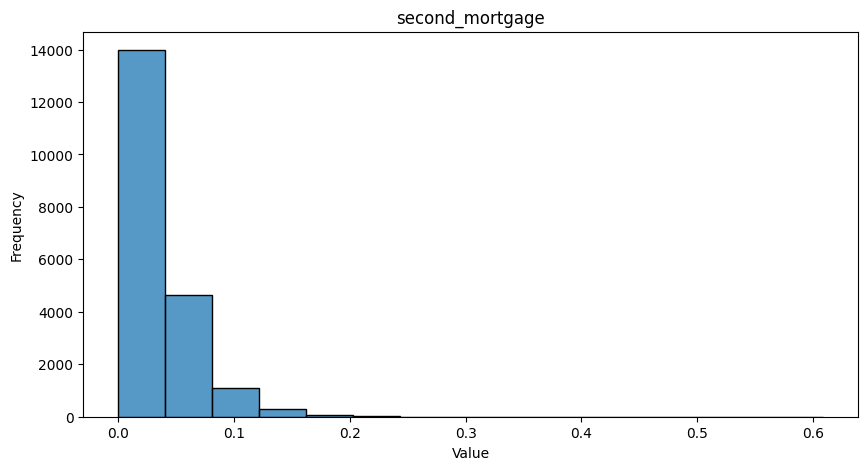

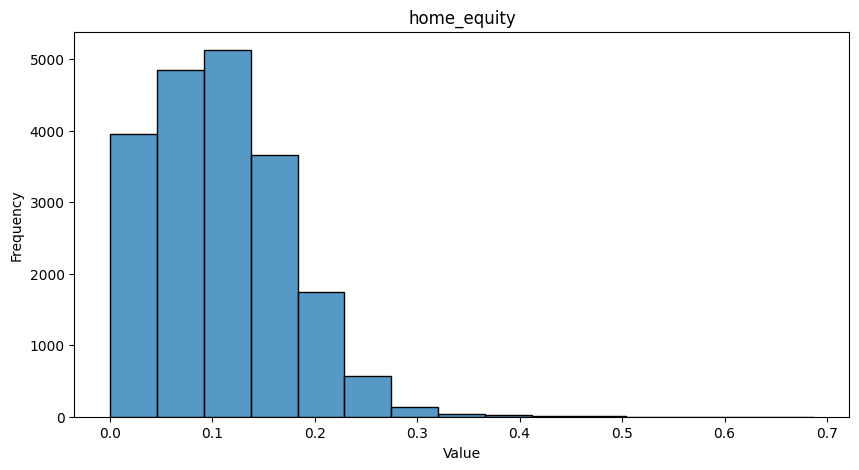

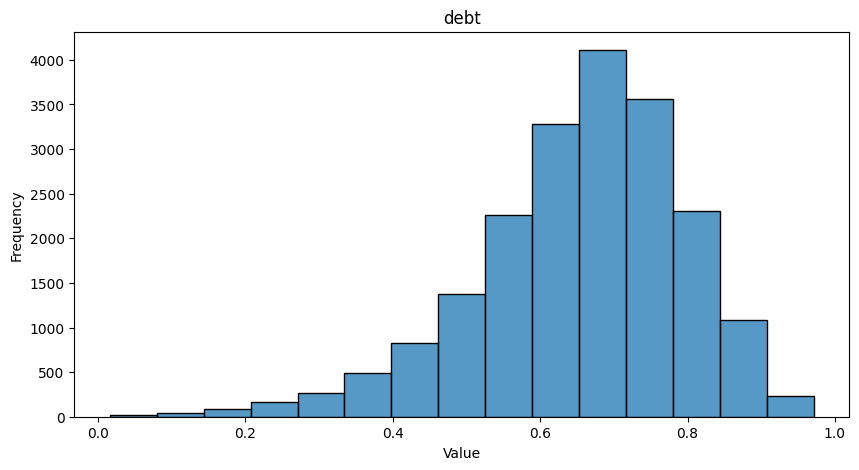

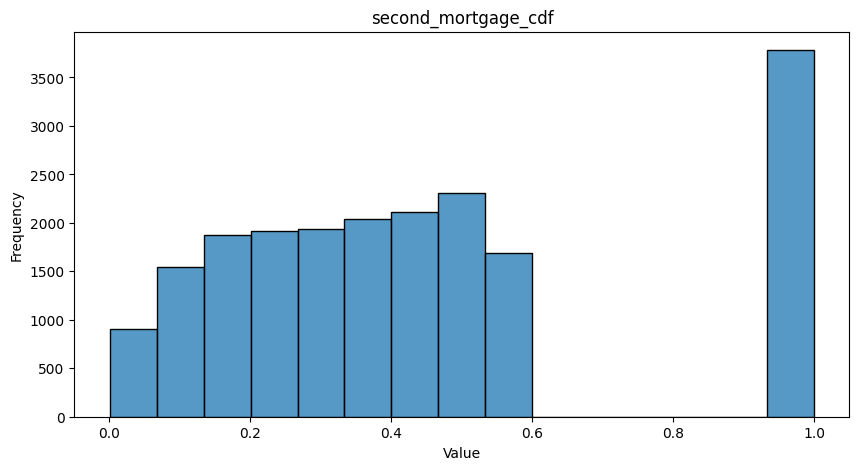

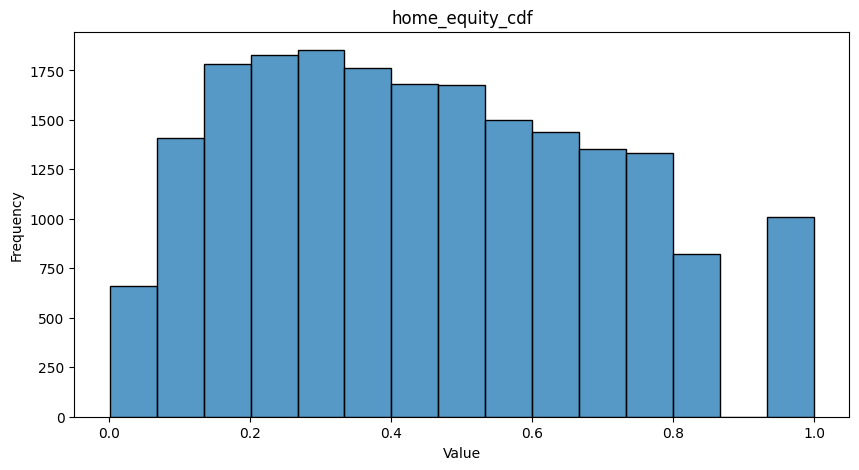

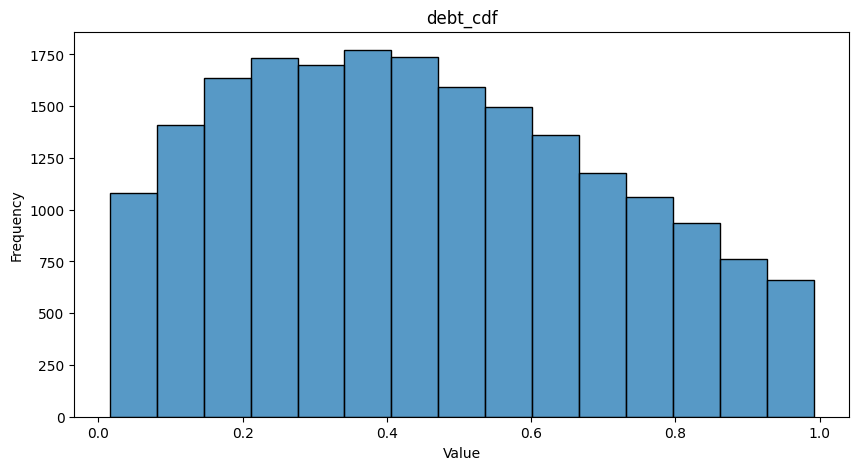

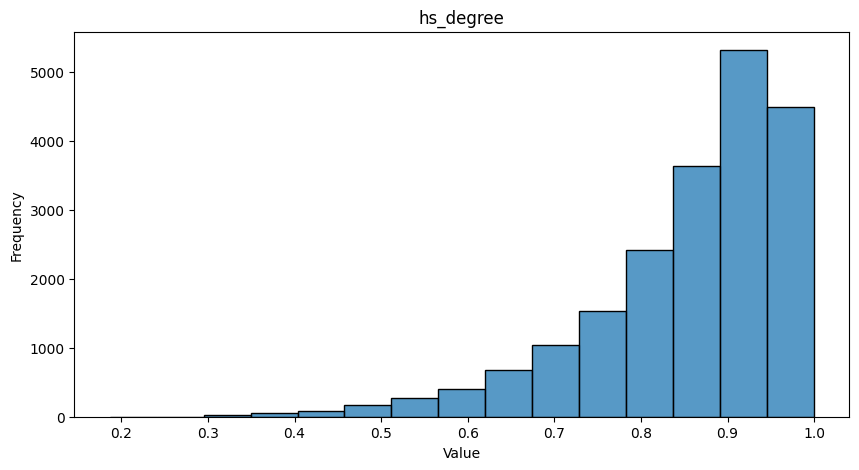

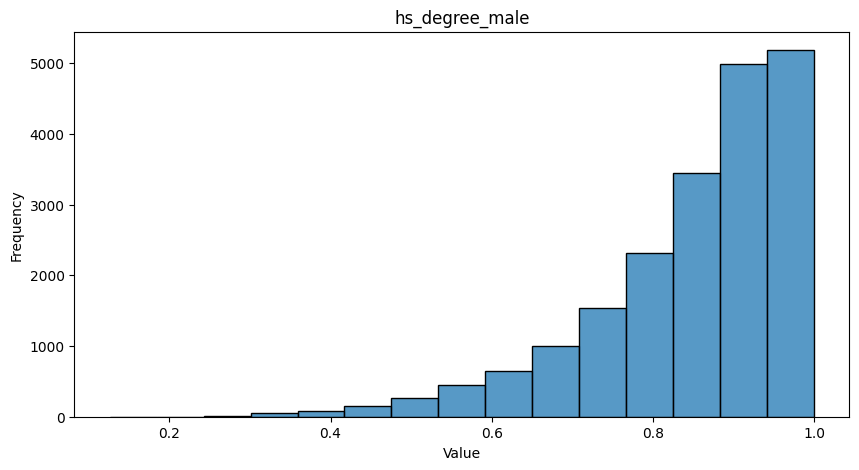

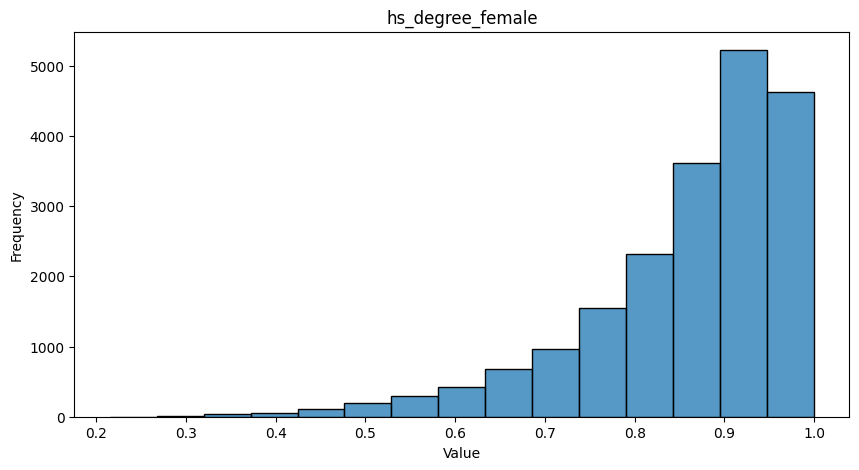

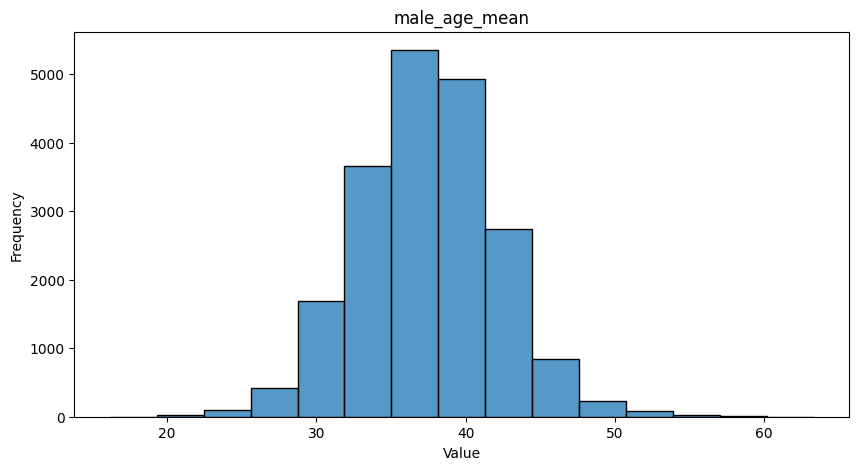

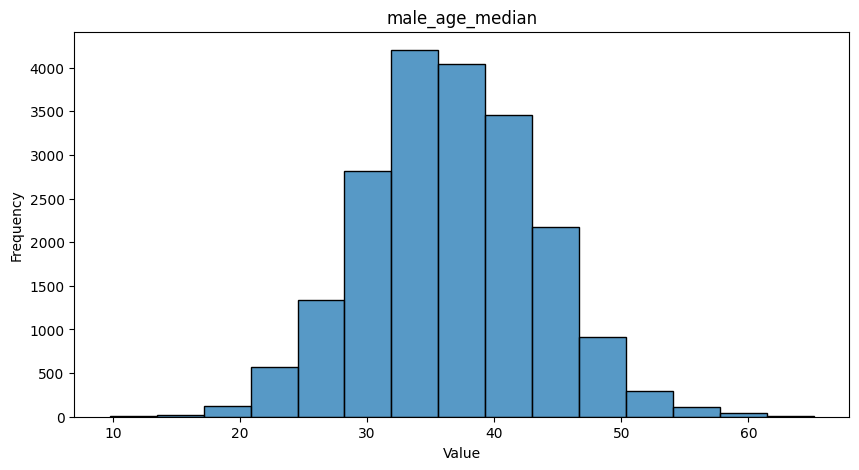

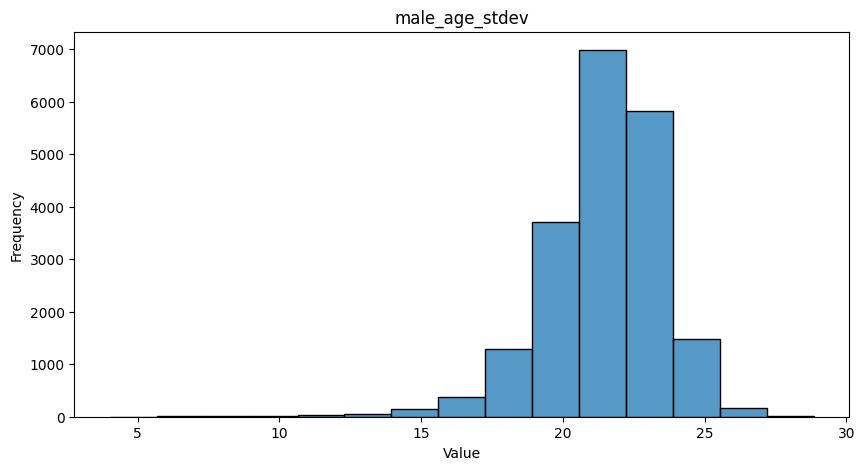

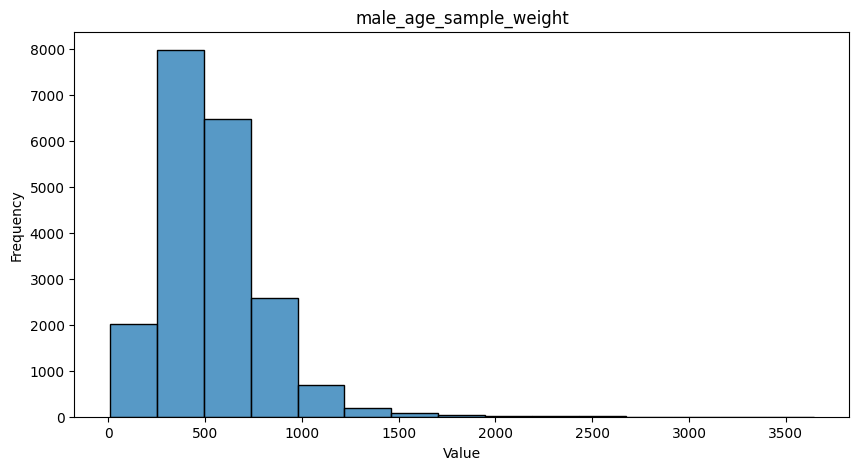

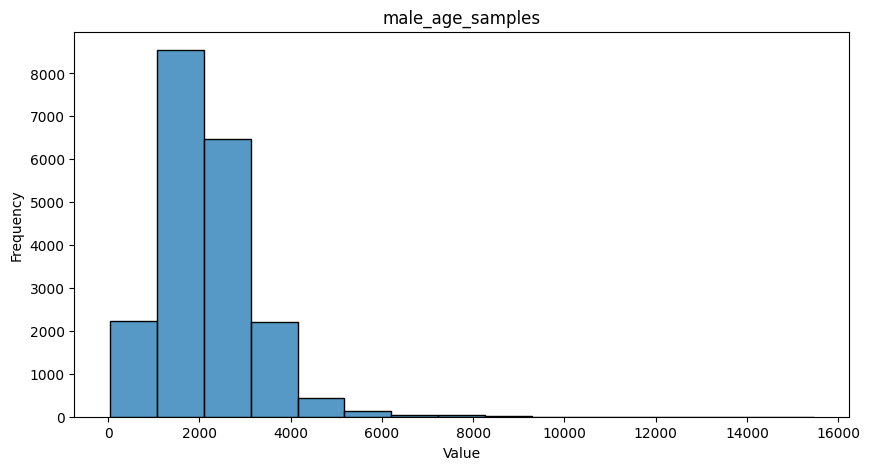

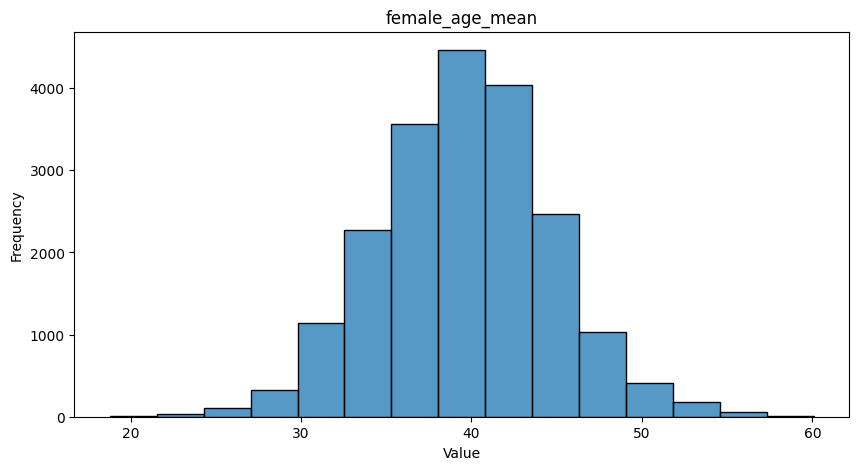

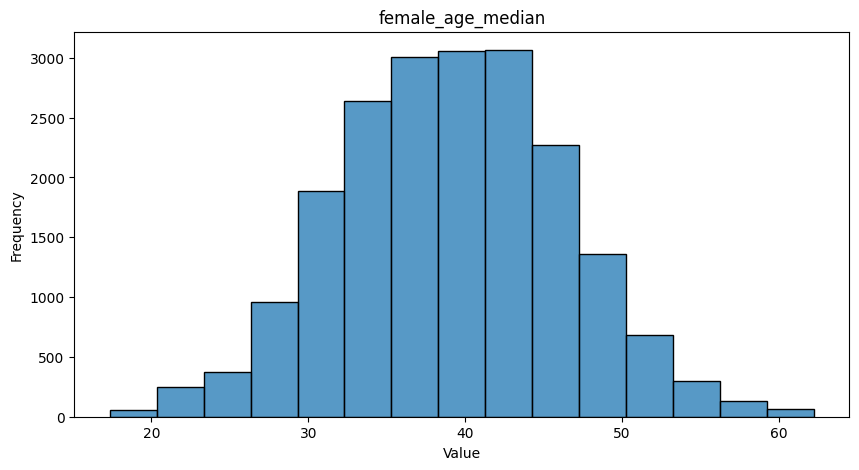

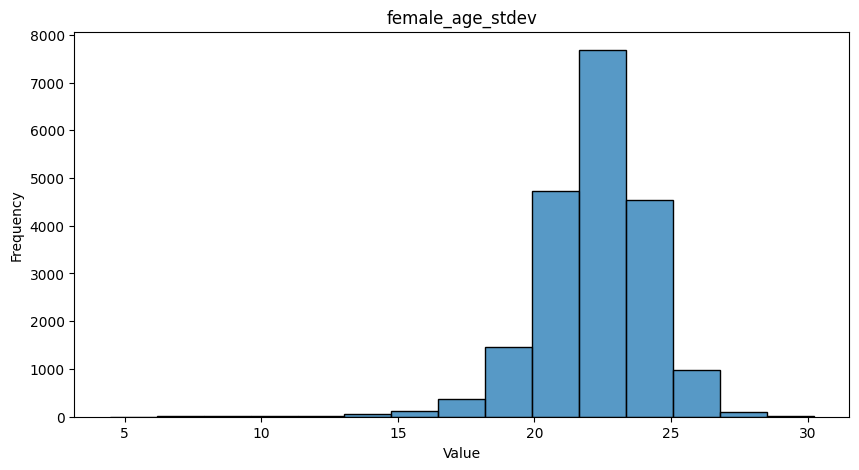

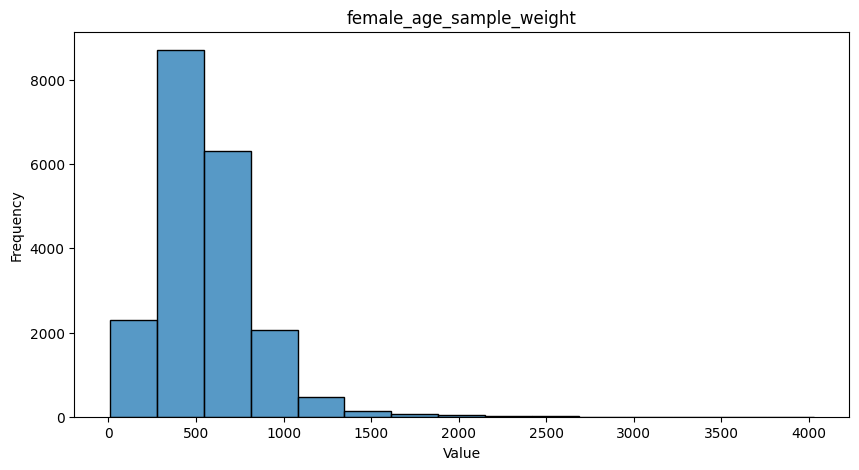

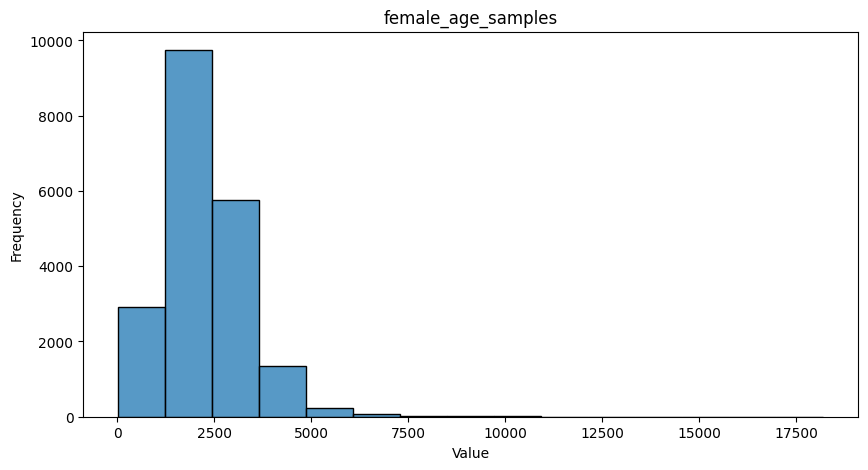

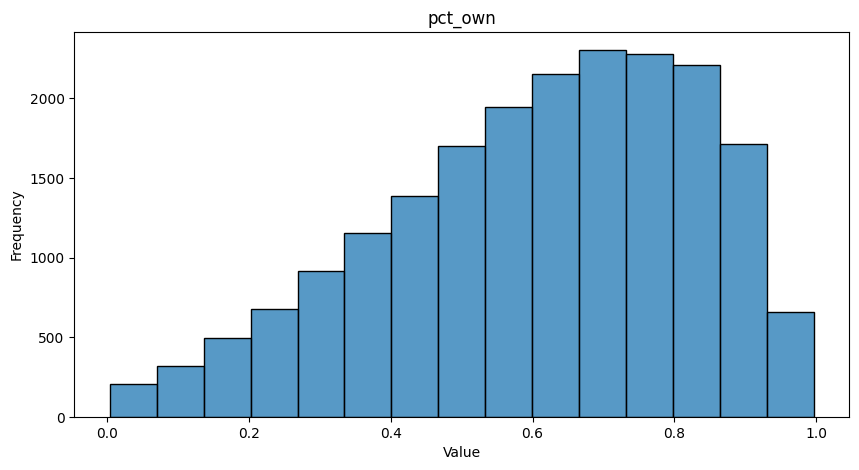

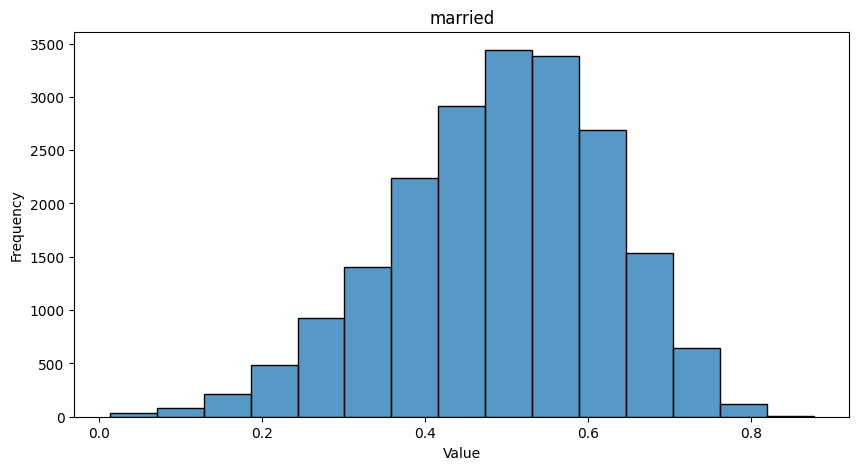

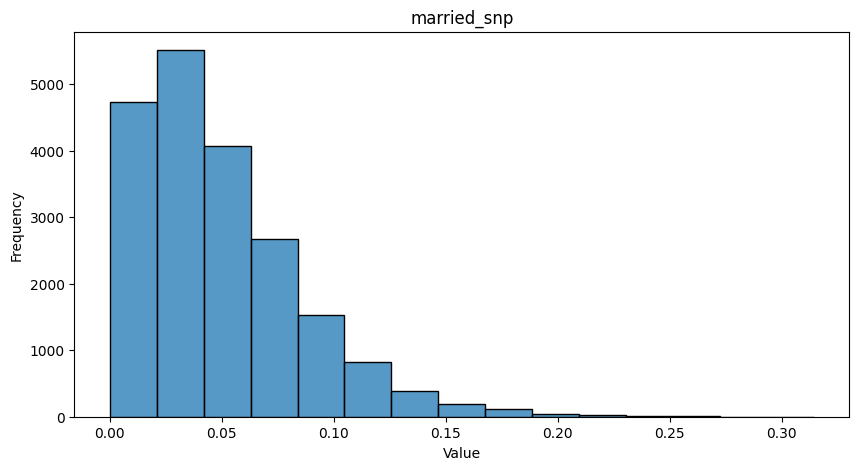

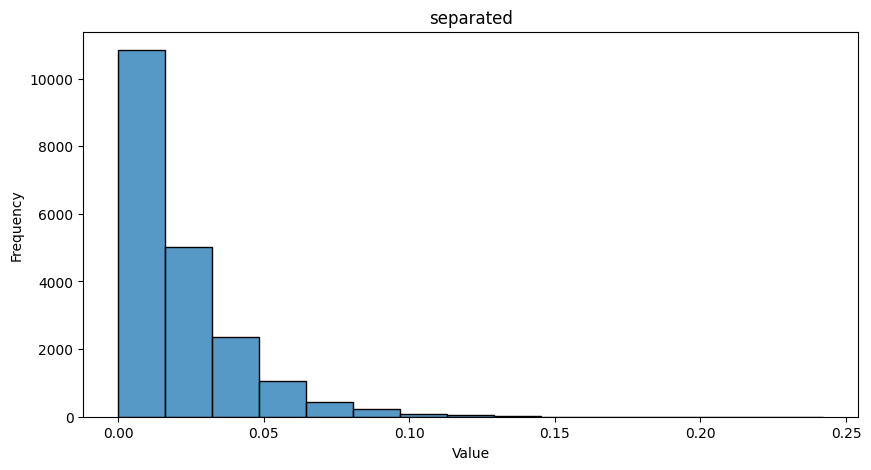

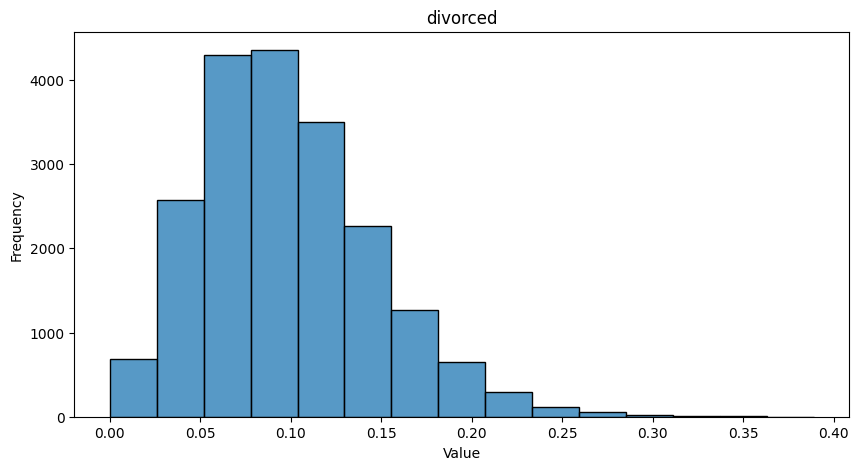

In [16]:
for i in numeric_cols:
  plt.figure(figsize=(10,5))
  ax3 = sns.histplot(data[i], bins=15)
  ax3.set_xlabel('Value')
  ax3.set_ylabel('Frequency')
  ax3.set_title(i)

***Có thể Standard Scaler cho các numeric_cols***

# **IMBALANCED DATA DETECTION AND TREATMENT**

***Label encoding cho các columns object***

In [18]:
# Tạo từ điển lưu ánh xạ cho từng cột
encoding_maps = {}

# Thực hiện Label Encoding và lưu mapping
for i in ['city', 'place', 'type']:
  frequency = data[i].value_counts()
  sorted_values = frequency.index
  value_to_code = {value: code for code, value in enumerate(sorted_values)}
  data[i] = data[i].map(value_to_code)
  encoding_maps[i] = value_to_code

***KNN cho một số columns***

In [19]:
for i in category_cols:
  print(data[i].value_counts())
  print('\n')

COUNTYID
37     921
31     766
3      703
13     599
1      511
      ... 
211      1
150      1
205      1
600      1
130      1
Name: count, Length: 237, dtype: int64


STATEID
6     2559
48    1452
36    1397
12    1071
42    1046
39     902
17     895
26     719
37     637
34     569
13     529
51     526
25     435
18     430
24     426
4      414
53     388
8      370
47     362
29     345
55     318
27     310
22     281
45     261
72     257
9      254
21     244
40     240
41     229
1      228
32     203
20     199
49     184
19     160
5      149
35     137
31     128
28     112
54      99
15      77
44      72
11      63
16      59
33      59
10      57
30      49
23      46
38      36
46      35
56      34
50      30
2       30
Name: count, dtype: int64


city
0       280
1       252
2       214
3       207
4       156
       ... 
4471      1
4472      1
4473      1
4474      1
4475      1
Name: count, Length: 4476, dtype: int64


place
0       429
1       104
2        81


In [20]:
def oversampling_multiple_targets(data, target_features, k_neighbors=5):
    df_resampled = data.copy()

    for target_feature in target_features:
        # Kiểm tra số lượng mẫu nhỏ nhất của các lớp
        if k_neighbors >= min(Counter(data[target_feature]).values()):
            print(f"k_neighbors quá lớn cho lớp thiểu số của {target_feature}, bỏ qua cột này.")
            continue

        # Tách X và y cho từng cột mục tiêu
        X = df_resampled.drop(target_feature, axis=1)  # Loại bỏ tất cả các cột mục tiêu
        y = df_resampled[target_feature]

        # Áp dụng SMOTE cho cột mục tiêu hiện tại
        oversampler = SMOTE(k_neighbors=k_neighbors)
        X_resampled, y_resampled = oversampler.fit_resample(X, y)

        # Cập nhật lại dữ liệu đã được oversample
        df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                  pd.DataFrame(y_resampled, columns=[target_feature])], axis=1)

    return df_resampled

In [21]:
target_features = ['type', 'STATEID']
new_data = oversampling_multiple_targets(data, target_features, k_neighbors=5)

In [22]:
new_data

,COUNTYID,city,place,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,type,STATEID
0,141,189,552,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.879240,848.000000,253.467470,312.586220,513.000000,0.974100,0.932270,0.699200,0.699200,0.551790,0.412350,0.390440,0.278880,542,502,41931.925930,35186.000000,31639.502030,838.746640,1127.000000,50670.103370,43023.000000,34715.575480,375.287980,554.000000,864.413900,784.000000,482.270200,316.883200,356.000000,351.982930,336.000000,125.404570,229.000000,189.606060,0.022220,0.022220,0.042740,0.608550,0.421740,0.708230,0.581200,0.904870,0.869470,0.941870,34.847280,32.000000,20.374520,323.902040,1349.000000,36.483910,37.583330,23.433530,267.233670,1284.000000,0.524830,0.348860,0.014260,0.014260,0.090300,0,18
1,63,125,915,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.773650,703.000000,323.390110,291.855200,378.000000,0.952380,0.886240,0.796300,0.666670,0.391530,0.391530,0.283070,0.158730,459,378,84942.683170,74964.000000,56811.621860,1155.209800,2488.000000,95262.514310,85395.000000,49292.676640,709.749250,1889.000000,1506.067580,1361.000000,731.893940,699.413540,1491.000000,556.459860,532.000000,184.421750,538.000000,323.353540,0.000000,0.000000,0.095120,0.734840,1.000000,0.463320,0.287040,0.942880,0.946160,0.939520,39.381540,40.833330,22.897690,888.297300,3643.000000,42.158100,42.833330,23.941190,707.019630,3238.000000,0.853310,0.647450,0.028300,0.016070,0.106570,0,18
2,127,57,157,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.420180,782.000000,297.392580,259.303160,368.000000,0.946930,0.871510,0.698320,0.617320,0.513970,0.469270,0.357540,0.329610,438,358,48733.671160,37845.000000,45100.540100,928.321930,1267.000000,56401.681330,44399.000000,41082.905150,490.184790,729.000000,1175.286420,1101.000000,428.987510,261.284710,437.000000,288.040470,247.000000,185.558870,392.000000,314.905660,0.010860,0.010860,0.010860,0.527140,0.530570,0.825300,0.737270,0.915000,0.907550,0.920430,48.647490,48.916670,23.059680,274.989560,1141.000000,47.775260,50.583330,24.320150,362.201930,1559.000000,0.650370,0.472570,0.020210,0.020210,0.101060,5,72
3,161,980,1445,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.564930,881.000000,392.440960,1005.428860,1704.000000,0.992860,0.982470,0.916880,0.847400,0.782470,0.609740,0.554550,0.444160,1725,1540,31834.154660,22497.000000,34046.509070,1548.674770,1983.000000,54053.423960,50272.000000,39609.126050,244.089030,395.000000,1192.587590,1125.000000,327.496740,76.610520,134.000000,443.688550,444.000000,76.126740,124.000000,79.555560,0.054260,0.054260,0.054260,0.519380,0.183320,0.655450,0.749670,1.000000,1.000000,1.000000,26.075330,22.416670,11.843990,1296.898770,2586.000000,24.176930,21.583330,11.104840,1854.486520,3051.000000,0.130460,0.123560,0.000000,0.000000,0.031090,0,20
4,79,978,803,35673,256,34.519582,-87.151801,7.840222e+07,487343,5475,2564,2911,605.102460,684.000000,230.159120,272.104050,287.000000,0.801390,0.745640,0.745640,0.581880,0.233450,0.233450,0.233450,0.080140,359,287,56912.141070,44873.000000,40121.439880,1391.845950,2095.000000,60875.

# **FEATURES SELECTION**

In [23]:
corr = new_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,COUNTYID,city,place,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,type,STATEID
COUNTYID,1.000000,-0.056987,-0.049592,-0.021035,0.103565,-0.102432,0.119874,-0.013614,-0.013924,-0.037251,-0.040730,-0.033012,-0.111768,-0.106130,-0.104047,0.070006,0.024183,0.010993,0.004619,0.025145,0.027804,0.038635,0.038472,0.031751,0.027117,0.024781,0.023158,-0.122748,-0.118956,-0.119271,0.030854,-0.036136,-0.119893,-0.120760,-0.099836,0.029374,-0.041435,-0.153362,-0.155674,-0.122967,0.007368,-0.069617,-0.115810,-0.116858,-0.070398,-0.019029,0.007778,-0.040387,-0.047562,-0.127029,-0.076570,0.059595,0.134430,0.074402,-0.101306,-0.103974,-0.092213,-0.085827,-0.091248,-0.032571,-0.035989,-0.040703,-0.067957,-0.073377,-0.023670,-0.024845,-0.032986,-0.063835,-0.061051,0.098070,0.137574,0.040913,-0.084803,0.208553
city,-0.056987,1.000000,0.675204,-0.093106,-0.023602,0.027843,0.084107,0.473334,0.338391,0.131823,0.138749,0.121946,-0.122612,-0.123790,-0.040110,-0.097564,-0.200935,-0.129287,-0.147413,-0.155445,-0.144440,-0.143232,-0.134310,-0.125439,-0.116839,-0.183472,-0.197521,0.040112,0.044275,0.034346,0.079997,0.111417,0.032076,0.035992,0.016167,0.166388,0.201069,-0.063967,-0.072531,0.026089,0.224590,0.174321,-0.052439,-0.055943,-0.000598,0.361401,0.367696,-0.100492,-0.099463,-0.063510,-0.172736,0.021449,0.056219,0.184366,0.053937,0.035587,0.071027,0.169619,0.198956,0.250665,0.126827,0.138748,0.157851,0.193933,0.223756,0.101245,0.121943,0.314254,0.287113,-0.141212,-0.100558,-0.002870,-0.017204,0.082862
place,-0.049592,0.675204,1.000000,-0.071435,-0.040187,0.012258,0.061348,0.490590,0.364245,0.177670,0.183699,0.167564,-0.107345,-0.108586,-0.055085,-0.123184,-0.219533,-0.142520,-0.156420,-0.162994,-0.158081,-0.147442,-0.150326,-0.149757,-0.146395,-0.199843,-0.216481,0.061845,0.069716,0.037799,0.103515,0.150325,0.042965,0.043686,0.018165,0.211160,0.253544,-0.079051,-0.090625,0.027377,0.281943,0.225985,-0.098846,-0.103569,-0.013612,0.411683,0.424178,-0.088592,-0.095009,-0.056059,-0.167282,0.014884,0.045629,0.176977,0.069018,0.047323,0.088439,0.188145,0.220039,0.248237,0.169164,0.183695,0.149705,0.200604,0.206029,0.145042,0.167562,0.357380,0.321741,-0.141722,-0.089419,0.001174,-0.037127,0.138251
zip_code,-0.021035,-0.093106,-0.071435,1.000000,0.001669,0.120722,-0.900737,-0.064769,-0.136531,0.102272,0.127797,0.075060,0.063001,0.049243,0.002522,0.099428,0.121943,0.027489,0.010408,-0.024527,-0.049542,-0.048149,-0.054821,-0.063423,-0.065557,0.108263,0.126411,0.002148,0.011831,-0.035000,0.066109,0.067418,-0.015902,-0.015385,-0.029763,0.065127,0.057069,-0.057927,-0.055708,-0.060820,0.042638,0.024623,-0.190400,-0.187014,-0.111120,-0.046637,-0.018895,0.044226,0.030124,-0.109216,0.065579,-0.050928,0.098326,-0.057120,0.030875,0.045592,0.014675,-0.152036,-0.156437,-0.088195,0.124287,0.127805,-0.183956,-0.185110,-0.053169,0.072872,0.075064,-0.063741,0.044347,0.003251,-0.069388,0.057597,-0.245243,-0.060156
area_code,0.103565,-0.023602,-0.040187,0.001669,1.000000,-0.150016,-0.029241,0.003757,0.014004,0.009833,0.012570,0.006982,0.020254,0.024507,-0.010859,-0.039092,-0.027579,0.039982,0.047604,0.031331,0.007643,0.015609,0.004

In [24]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

#Lọc ra các giá trị corr giữa các biến đầu vào và output
corr_label = corr['hc_mortgage_mean']

#So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với output thấp hơn thì sẽ được loại, ngược lại thì lưu
#Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra
columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'hc_mortgage_mean' or col2 == 'hc_mortgage_mean':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)

#Lọc đi các giá rị trùng lặp
columns_to_remove = list(set(columns_to_remove))
#print(columns_to_remove)

new_data = new_data.drop(columns = columns_to_remove)

In [26]:
category_cols = [col for col in new_data.columns if col in category_cols]
numeric_cols = [col for col in new_data.columns if col not in category_cols]
numeric_cols.remove('hc_mortgage_mean')
new_data

,COUNTYID,city,zip_code,area_code,lat,lng,AWater,rent_gt_10,hc_mortgage_mean,hc_mortgage_median,second_mortgage_cdf,debt_cdf,married_snp,divorced,type,STATEID
0,141,189,46616,574,41.701441,-86.266614,100363,0.974100,864.413900,784.000000,0.421740,0.581200,0.014260,0.090300,0,18
1,63,125,46122,317,39.792202,-86.515246,284193,0.952380,1506.067580,1361.000000,1.000000,0.287040,0.028300,0.106570,0,18
2,127,57,927,787,18.396103,-66.104169,0,0.946930,1175.286420,1101.000000,0.530570,0.737270,0.020210,0.101060,5,72
3,161,980,66502,785,39.195573,-96.569366,0,0.992860,1192.587590,1125.000000,0.183320,0.749670,0.000000,0.031090,0,20
4,79,978,35673,256,34.519582,-87.151801,487343,0.801390,1137.052150,1141.000000,1.000000,0.856390,0.006800,0.169100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637540,107,108,871,787,18.321426,-66.153243,0,0.947793,1102.460684,1030.758529,0.566367,0.751325,0.026772,0.097335,5,72
637541,126,180,915,787,18.361706,-66.064478,164,0.946954,1877.048660,1713.675306,0.521291,0.712035,0.055235,0.093230,5,72
637542,128,610,908,787,18.418723,-66.153689,112128,1.000000,757.787256,783.246497,0.485827,0.855460,0.026216,0.184471,5,72
637543,92,930,746,787,18.211702,-66.550022,0,0.876578,752.546901,803.298842,1.000000,0.877450,0.059972,0.098732,5,72


***Hàm biến đổi các giá trị (numeric) để có thể chuẩn hóa dữ liệu phù hợp***

In [27]:
#Hàm xử lý các cột bị lệch bằng phép biến đổi logarit, đưa chúng về các giá trị ít lệch hơn
def transform_skewed_features(new_data, skewed_features):
  for col in skewed_features:
    new_data[col] = np.log1p(new_data[col])
  return new_data

#standard Scaler chuẩn hóa các cột có phân phối bình thường
def transform_non_skewed_features(new_data, non_skewed_features):
  standardScaler = StandardScaler()
  for col in non_skewed_features:
    new_data[col] = standardScaler.fit_transform(new_data[[col]])
  return new_data

In [31]:
new_data = transform_non_skewed_features(new_data, non_skewed_features = ['lat', 'lng', 'second_mortgage_cdf', 'debt_cdf', 'divorced'])
new_data = transform_skewed_features(new_data, skewed_features = ['AWater', 'rent_gt_10', 'hc_mortgage_median', 'married_snp', 'hc_mortgage_mean'])

In [32]:
new_data

,COUNTYID,city,zip_code,area_code,lat,lng,AWater,rent_gt_10,hc_mortgage_mean,hc_mortgage_median,second_mortgage_cdf,debt_cdf,married_snp,divorced,type,STATEID
0,141,189,46616,574,0.657185,0.328112,11.516559,0.680113,6.763208,6.665684,-0.095136,0.561547,0.014159,-0.399388,0,18
1,63,125,46122,317,0.308191,0.312168,12.557412,0.669049,7.317921,7.216709,2.439292,-0.866247,0.027907,0.014532,0,18
2,127,57,927,787,-3.602847,1.621082,0.000000,0.666254,7.070118,7.004882,0.381850,1.319080,0.020008,-0.125646,5,72
3,161,980,66502,785,0.199132,-0.332579,0.000000,0.689571,7.084719,7.026427,-1.140095,1.379267,0.000000,-1.905731,0,20
4,79,978,35673,256,-0.655602,0.271347,13.096726,0.588559,7.037073,7.040536,2.439292,1.897264,0.006777,1.605338,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637540,107,108,871,787,-3.616497,1.617935,0.000000,0.666697,7.006207,6.939020,0.538741,1.387301,0.026420,-0.220410,5,72
637541,126,180,915,787,-3.609134,1.623627,5.105945,0.666266,7.537989,7.446979,0.341182,1.196592,0.053763,-0.324858,5,72
637542,128,610,908,787,-3.598712,1.617907,11.627405,0.693147,6.631721,6.664723,0.185749,1.892751,0.025878,1.996384,5,72
637543,92,930,746,787,-3.636554,1.592491,0.000000,0.629450,6.624791,6.689971,2.439292,1.999484,0.058242,-0.184867,5,72


# **PREDICTION**

In [33]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(mean_squared_error(y_test, y_pred))

In [34]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(new_data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = new_data.drop(columns=['hc_mortgage_mean'], axis=1)
    y = new_data['hc_mortgage_mean']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [35]:
new_data['hc_mortgage_mean'].describe()

,hc_mortgage_mean
count,637545.000000
mean,7.291750
std,0.291144
min,6.000627
25%,7.084480
50%,7.270146
75%,7.484204
max,8.403653


In [36]:
X_train, X_test, y_train, y_test = preprocess_data(new_data)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'K-Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Huấn luyện và đánh giá từng mô hình
results = {}
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập train và test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Đánh giá mô hình bằng các chỉ số
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'Model: {name}')
    print(f'- MSE, MAE, R2 of training: {mse_train}, {mae_train}, {r2_train}')
    print(f'- MSE, MAE, R2 of testing: {mse_test}, {mae_test}, {r2_test}')
    print('\n')

Model: Linear Regression
- MSE, MAE, R2 of training: 0.001885280063573769, 0.03144118134128076, 0.9777565717829103
- MSE, MAE, R2 of testing: 0.001899898969815454, 0.031375213923521314, 0.9775946883185463


Model: Ridge Regression
- MSE, MAE, R2 of training: 0.0018852802090448006, 0.031441483919617, 0.9777565700665741
- MSE, MAE, R2 of testing: 0.0018999019401040632, 0.03137558480303748, 0.9775946532902405


Model: K-Neighbors
- MSE, MAE, R2 of training: 0.027189858808973937, 0.11656015008526442, 0.6792011519478156
- MSE, MAE, R2 of testing: 0.04209873201124386, 0.14668491376863277, 0.5035340157074083


Model: XGBoost
- MSE, MAE, R2 of training: 0.0011433946958127525, 0.024757591185255785, 0.9865096871645156
- MSE, MAE, R2 of testing: 0.0012092013484366255, 0.025256179075249578, 0.9857400137966346


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

# **KIỂM THỬ**

In [37]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/Real estate Banking/test.csv')

In [38]:
test_cols = new_data.columns.to_list()
test = test[test_cols]
test = test.dropna()
test

,COUNTYID,city,zip_code,area_code,lat,lng,AWater,rent_gt_10,hc_mortgage_mean,hc_mortgage_median,second_mortgage_cdf,debt_cdf,married_snp,divorced,type,STATEID
0,163,Detroit,48239,313,42.346422,-83.252823,39555,1.00000,1139.24548,1109.0,0.14111,0.51965,0.05910,0.14299,CDP,26
1,1,Auburn,4210,207,44.100724,-70.257832,2705204,1.00000,1533.25988,1438.0,0.52310,0.49359,0.02338,0.13377,City,23
2,15,Pine City,14871,607,41.948556,-76.783808,863840,0.97573,1254.54462,1089.0,0.51066,0.83848,0.01746,0.10026,Borough,42
3,231,Monticello,42633,606,36.746009,-84.766870,2623067,1.00000,862.65763,749.0,0.53770,0.87403,0.05492,0.12489,City,21
4,355,Corpus Christi,78410,361,27.882462,-97.678586,497689,0.72276,1996.41425,1907.0,1.00000,0.52943,0.01726,0.16379,Town,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,105,Lakeland,33810,863,28.226068,-82.068886,1166617,1.00000,1269.83033,1119.0,0.29592,0.85762,0.02135,0.08780,City,12
11705,31,Chicago,60609,773,41.804936,-87.667304,0,1.00000,1406.83478,1224.0,0.16199,0.52957,0.07781,0.05305,Village,17
11706,9,Lawrence,1841,978,42.737778,-71.131761,393810,0.85375,1791.63902,1794.0,0.37297,0.26972,0.00108,0.07294,City,25
11707,27,Carroll,51401,712,42.081366,-94.866175,0,0.96886,1182.30365,1059.0,0.30010,0.47507,0.02738,0.04694,City,19


In [39]:
for i in ['city', 'place', 'type']:
  if i not in test.columns:
    continue
  else:
    test[i] = test[i].map(encoding_maps[i])

In [41]:
test = transform_non_skewed_features(test, non_skewed_features = ['lat', 'lng', 'second_mortgage_cdf', 'debt_cdf', 'divorced'])
test = transform_skewed_features(test, skewed_features = ['AWater', 'rent_gt_10', 'hc_mortgage_median', 'married_snp', 'hc_mortgage_mean'])

In [42]:
test

,COUNTYID,city,zip_code,area_code,lat,lng,AWater,rent_gt_10,hc_mortgage_mean,hc_mortgage_median,second_mortgage_cdf,debt_cdf,married_snp,divorced,type,STATEID
0,163,10.0,48239,313,0.876844,0.496485,10.585473,0.693147,7.038999,7.012115,-1.095264,0.102854,0.057419,0.909915,3,26
1,1,101.0,4210,207,1.190155,1.292726,14.810688,0.693147,7.335803,7.271704,0.198832,0.003860,0.023111,0.716319,0,23
2,15,NaN,14871,607,0.805787,0.892860,13.669144,0.680938,7.135325,6.993933,0.156688,1.313992,0.017309,0.012697,4,42
3,231,740.0,42633,606,-0.123366,0.403715,14.779855,0.693147,6.761176,6.620073,0.248293,1.449036,0.053465,0.529862,0,21
4,355,217.0,78410,361,-1.706358,-0.387423,13.117733,0.543928,7.599609,7.553811,1.814461,0.140006,0.017113,1.346661,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,105,139.0,33810,863,-1.644991,0.569028,13.969620,0.693147,7.147426,7.021084,-0.570803,1.386699,0.021125,-0.248931,0,12
11705,31,0.0,60609,773,0.780137,0.225997,0.000000,0.693147,7.249808,7.110696,-1.024528,0.140537,0.074931,-0.978590,2,17
11706,9,199.0,1841,978,0.946738,1.239177,12.883626,0.617211,7.491444,7.492760,-0.309775,-0.846553,0.001079,-0.560952,0,25
11707,27,NaN,51401,712,0.829506,-0.215099,0.000000,0.677455,7.076066,6.966024,-0.556642,-0.066491,0.027012,-1.106884,0,19


In [43]:
test['hc_mortgage_mean'].describe()

,hc_mortgage_mean
count,11418.000000
mean,7.331788
std,0.365490
min,5.859361
25%,7.050307
50%,7.289339
75%,7.595951
max,8.403653


In [53]:
new_test = test.drop(columns=['hc_mortgage_mean'], axis=1)

#Dự đoán bằng mô hình XGB:
predicted_test = models['XGBoost'].predict(new_test)
predicted_test

array([7.0808816, 7.371004 , 7.086877 , ..., 7.535169 , 7.0541053,
       7.203809 ], dtype=float32)

In [55]:
#Chuyển array thành dataframe
predicted_test = pd.DataFrame(predicted_test)

#Xóa đi chỉ số Index của test['hc_mortgage_mean']
test['hc_mortgage_mean'] = test['hc_mortgage_mean'].reset_index(drop=True)

#Chuyển thành dataframe
final_predicted_df = pd.concat([predicted_test, test['hc_mortgage_mean']], axis=1)
final_predicted_df.columns = ['predicted_test', 'hc_mortgage_mean']
final_predicted_df = final_predicted_df.dropna()
final_predicted_df['error'] = final_predicted_df['predicted_test']/final_predicted_df['hc_mortgage_mean']
final_predicted_df

,predicted_test,hc_mortgage_mean,error
0,7.080882,7.038999,1.005950
1,7.371004,7.335803,1.004798
2,7.086877,7.135325,0.993210
3,6.762109,6.761176,1.000138
4,7.570214,7.599609,0.996132
...,...,...,...
10573,7.008663,8.155479,0.859381
10574,6.824159,7.147426,0.954772
10575,7.583482,7.491444,1.012286
10576,6.965680,7.076066,0.984400


In [56]:
final_predicted_df['error'].describe()

,error
count,10317.000000
mean,1.002055
std,0.069795
min,0.809145
25%,0.951674
50%,1.000590
75%,1.049268
max,1.354118


# **NHẬN XÉT: CÁC MÔ HÌNH ĐỀU TỐT, TA CÓ THỂ CHỌN RA XGBOOST LÀM MÔ HÌNH ĐẠI DIỆN**